<a href="https://colab.research.google.com/github/SantiagoUNAL/ML-Applications-in-Actuarial-Sciences/blob/main/Entendimiento_de_los_datos_Proyecto_1_(Santiago_Prieto_Betancur).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CRISP-DM Fase de Entendimiento de los datos

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# import io
# import pandas as pd
# df = pd.read_csv(io.BytesIO(uploaded['medmal_pos.csv']))
# Dataset is now stored in a Pandas Dataframe

In [1]:
import io
import pandas as pd

url = 'https://raw.githubusercontent.com/SantiagoUNAL/ML-Applications-in-Actuarial-Sciences/main/medmal_pos.csv'
df = pd.read_csv(url)

En esta parte se exporto la base de datos "medmal_pos.csv" desde el repositorio de GitHub.

In [2]:
df

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2,CumPaidLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2,Single,PostedReserve97_F2
0,669,Scpie Indemnity Co,1988,1988,1,121905,2716,97966,129104,-6214,135318,0,344558
1,669,Scpie Indemnity Co,1988,1989,2,112211,24576,64117,129104,-6214,135318,0,344558
2,669,Scpie Indemnity Co,1988,1990,3,103226,43990,39008,129104,-6214,135318,0,344558
3,669,Scpie Indemnity Co,1988,1991,4,99599,59722,20736,129104,-6214,135318,0,344558
4,669,Scpie Indemnity Co,1988,1992,5,96006,71019,13599,129104,-6214,135318,0,344558
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,44504,California Healthcare Ins Co Inc,1997,2002,6,3970,3971,-1,9711,5704,4007,1,15719
3396,44504,California Healthcare Ins Co Inc,1997,2003,7,3965,3965,0,9711,5704,4007,1,15719
3397,44504,California Healthcare Ins Co Inc,1997,2004,8,3965,3965,0,9711,5704,4007,1,15719
3398,44504,California Healthcare Ins Co Inc,1997,2005,9,3965,3965,0,9711,5704,4007,1,15719


# Descripción de los datos

A continuación presentaremos todo el análisis correspondiente a los datos disponibles para realizar ciencia de datos. En esta parte del proyecto vamos a visualizar y explorar los datos que son parte del proyecto a desarrollar.

En primer lugar, vamos a realizar una descripción general de la base de datos y de la metadata. Estos datos almacenan la información de los triangulos de perdida que pueden ser usados en estudios de reportes de reservas. Los datos incluyen las principales lineas de negocio tanto personales como comerciales de los aseguradores de accidentes inmobiliarios de Estados Unidos. Los reclamos o reportes de los datos provienen de la base de datos Schedule P - Analysis of Losses and Loss Expenses in the National Association of Insurance Commissioners (NAIC).

Es importante dentro de la descripción de los datos brindar un análisis de la metadata que nos brinda la información necesaria para entender cual es el contenido de los datos que se analizarán en el proyecto.

Dentro de la base de datos de reportes hechos por malas practicas médicas se encuentran incluidas las siguientes variables que fueron extraidas de cuatro partes diferentes en el Schedule P.

**Parte 1** - Prima ganada y algunos datos resumidos de pérdidas

**Parte 2** - Triángulos de pérdida neta incurrida

**Parte 3** - Triángulos de pérdida neta pagada

**Parte 4** - Reservas Bulk e IBNR (Incurred but not reported) sobre pérdidas netas y gastos de contención de costos

Los triángulos consisten en pérdidas netas de reaseguramiento y es muy frecuente que grupos de aseguramiento tengan acuerdos mutuos de reaseguramiento entre las empresas del grupo. Por lo tanto, la base de datos se estructuro de tal forma que los registros de las entidades correspondan a un grupo de aseguradoras o verdaderas aseguradoras que operen individualmente.

De acuerdo con Casualty Actuarial Society (CAS) el proceso de preparación de los datos tomo los siguientes tres pasos:

**Paso 1:** Los datos del triángulo se extrajeron del Schedule P del año 1997. Cada triangulo incluye reportes de 10 años de accidentes (1988-1997) y 10 retrasos en el desarrollo. Estos datos son los datos de entrenamiento que se pueden usar para desarrollar modelos.

**Paso 2:** Se completaron los triangulos del Schedule P del año 1997 con los resultados del Schedule P de los años siguientes. Especificamente, los datos de los accidentes para el año 1989 fueron extraidos del Schedule P del año 1998, los datos de los accidentes para el año 1990 fueron extraidos del Schedule P del año 1999 y así sucesivamente hasta que los datos de los accidentes para el año 1997 fueron extraidos del Schedule P del año 2006. Los datos en los triangulos inferiores pueden ser usados para validar los modelos desarrollados.

**Paso 3:** Muestreo. Se realizó un análisis preliminar para garantizar la calidad de la base de datos. Las aseguradoras que permanecieron en la última versión de la base de datos cumplian los siguientes criterios:


1.   La aseguradora estaba disponible tanto en el Schedule P del año 1997 y en los años posteriores.
2.   Las observaciones (10 años de accidentalidad y 10 retrasos en el desarrollo) estaban completos para la aseguradora.
3.   Los reportes del Schedule P del año 1997 coincidian con aquellos de los años siguientes.
4.   Las primas netas emitidas no son cero para todos los años.

# Configuración de los metadatos

La base de datos de reportes hechos por malas practicas médicas contiene 3400 datos de los cuales se almacenan la información de 34 entidades que corresponden a un grupo de aseguradoras o verdaderas aseguradoras que operen individualmente y cada una de estas entidades tiene registrado los reportes atendidos en los años de accidentalidad de 1988 a 1997 (10 años) con 10 años de retraso en el desarrollo. Adicionalmente, las etiquetas de cada columna que se incluye en la base de datos son las siguientes:



1.   **GRCODE NAIC** código de la compañia (incluyendo grupo de aseguradoras o verdaderas aseguradoras que operen individualmente)
2.   **GRNAME NAIC** nombre de la compañia (incluyendo grupo de aseguradoras o verdaderas aseguradoras que operen individualmente)
3.   **AccidentYear** Año del accidente(1988 a 1997)
4.   **DevelopmentYear** Año de desarrollo (1988 a 1997)
5.   **DevelopmentLag** Retraso en el desarrollo (usa la siguiente fórmula $AccidentYear - 1987 + DevelopmentYear - 1987 - 1$)
6.   **IncurLoss_F2** Pérdidas incurridas y gastos asignados reportados al final del año
7.   **CumPaidLoss_F2** Pérdidas pagadas acumuladas y gastos asignados al final del año
8.   **BulkLoss_F2** Reservas Bulk e IBNR sobre pérdidas netas y gastos de defensa y contención de costos reportados al final del año
9.   **PostedReserve97_F2** Reservas contabilizadas en el año 1997 tomadas del Anexo de Suscripción e Inversiones (Underwriting and Investment Exhibit).
10.   **EarnedPremDIR_F2** Primas devengadas en el año incurrido: directas y asumidas
11.   **EarnedPremCeded_F2** Primas devengadas en el año incurrido: cedidas
12.   **EarnedPremNet_F2** Primas devengadas en el año en que se incurrió: netas
13.   **Single** 1 indica una sola entidad, 0 indica una aseguradora grupal

Es importante tener presente que esta base de datos tiene variables categoricas como **GRNAME NAIC** las cuales merecen un tratamiento diferente en la fase de modelado. Sin embargo, este tipo de variable se puede omitir ya que el código de la compañia (**GRCODE NAIC**) almacena la misma información en un formato numérico.







In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

# df.loc[df['GRCODE']== 669]
df.loc[df['DevelopmentLag']== 1]

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2,CumPaidLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2,Single,PostedReserve97_F2
0,669,Scpie Indemnity Co,1988,1988,1,121905,2716,97966,129104,-6214,135318,0,344558
10,669,Scpie Indemnity Co,1989,1989,1,122679,3835,104402,131948,20010,111938,0,344558
20,669,Scpie Indemnity Co,1990,1990,1,118157,4838,99473,112742,13449,99293,0,344558
30,669,Scpie Indemnity Co,1991,1991,1,117981,4456,93508,101814,5331,96483,0,344558
40,669,Scpie Indemnity Co,1992,1992,1,131059,5970,103660,94694,-3914,98608,0,344558
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3350,44504,California Healthcare Ins Co Inc,1993,1993,1,3310,51,2449,11248,6433,4815,1,15719
3360,44504,California Healthcare Ins Co Inc,1994,1994,1,5373,255,2200,13341,6476,6865,1,15719
3370,44504,California Healthcare Ins Co Inc,1995,1995,1,3796,32,1917,10190,4967,5223,1,15719
3380,44504,California Healthcare Ins Co Inc,1996,1996,1,3383,74,2002,9396,6351,3045,1,15719


In [ ]:
df.loc[df['GRNAME']== 'Overseas Partners Us Reins Co']

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2,CumPaidLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2,Single,PostedReserve97_F2
500,10019,Overseas Partners Us Reins Co,1988,1988,1,0,0,0,0,0,0,1,0
501,10019,Overseas Partners Us Reins Co,1988,1989,2,0,0,0,0,0,0,1,0
502,10019,Overseas Partners Us Reins Co,1988,1990,3,0,0,0,0,0,0,1,0
503,10019,Overseas Partners Us Reins Co,1988,1991,4,0,0,0,0,0,0,1,0
504,10019,Overseas Partners Us Reins Co,1988,1992,5,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,10019,Overseas Partners Us Reins Co,1997,2002,6,0,0,0,0,0,0,1,0
596,10019,Overseas Partners Us Reins Co,1997,2003,7,0,0,0,0,0,0,1,0
597,10019,Overseas Partners Us Reins Co,1997,2004,8,0,0,0,0,0,0,1,0
598,10019,Overseas Partners Us Reins Co,1997,2005,9,0,0,0,0,0,0,1,0


In [4]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

r = df['GRNAME']
Names = []
for i in range(34):
  print(r[100*i])
  Names = np.append(Names,[r[100*i]])


np.size(Names)

Scpie Indemnity Co
Promutual Grp
Great Amer Grp
Nationwide Grp
Markel Corp Grp
Overseas Partners Us Reins Co
Eastern Dentists Ins Co RRG
American Assoc Of Othodontists RRG
Controlled Risk Ins Co Of VT Inc
Texas Medical Ins Co
MCIC VT Inc RRG
Franklin Cas Ins Co RRG
Homestead Ins Co
Campmed Cas & Ind Co Inc MD
Community Blood Cntr Exch RRG
Underwriters At Lloyds London
NCMIC Ins Co
National American Ins Co
Michigan Professional Ins Exch
Nichido Fire & Marine Ins Co Ltd
Texas Hospital Ins Exch
State Volunteer Mut Ins Co
MHA Ins Co
Health Care Ind Inc
National Guardian RRG Inc
Preferred Professional Ins Co
Medical Mut Ins Co Of ME
Utah Medical Ins Assoc
Seguros Triples Inc
Dentists Ins Co
Physicians Recip Insurers
Louisiana Med Mut Ins Co
Clinic Mut Ins Co RRG
California Healthcare Ins Co Inc


34

In [5]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

r = df['GRCODE']
Codes = []
for i in range(34):
  print(r[100*i])
  Codes = np.append(Codes,[r[100*i]])


np.size(Codes)

669
683
841
1406
7854
10019
10115
10232
10341
10393
10697
10842
11460
12260
13893
15792
15865
23663
31429
32301
32514
33049
33111
35904
36072
36234
36277
36676
40568
40975
41467
43656
43770
44504


34

In [6]:
pip install chainladder

In [7]:
import chainladder as cl

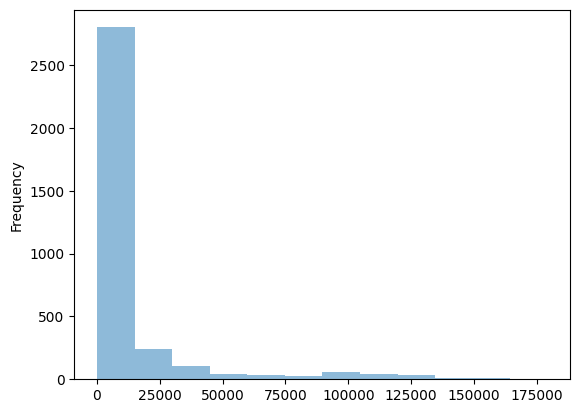

In [8]:
df_IncurLoss_F2 = df['IncurLoss_F2']
ax1 = df_IncurLoss_F2.plot.hist(bins=12, alpha=0.5)

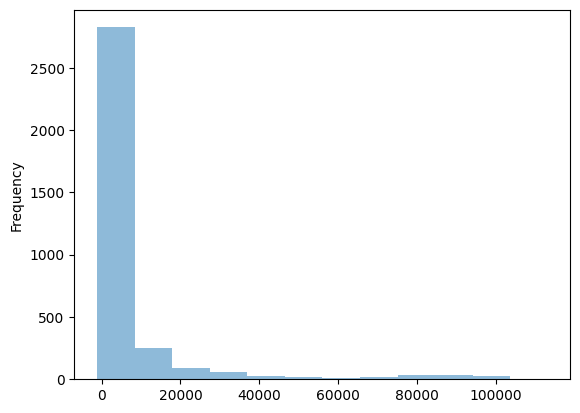

In [ ]:
df_CumPaidLoss_F2 = df['CumPaidLoss_F2']
ax2 = df_CumPaidLoss_F2.plot.hist(bins=12, alpha=0.5)

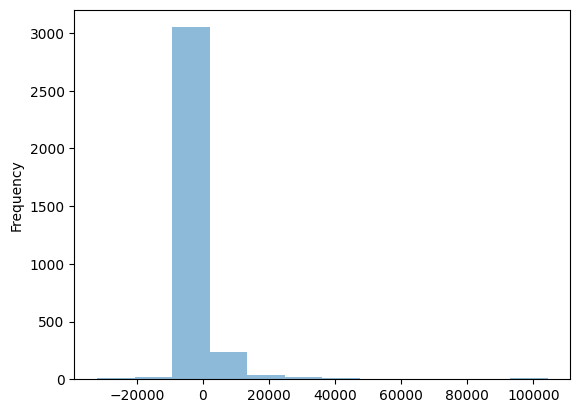

In [ ]:
df_BulkLoss_F2 = df['BulkLoss_F2']
ax3 = df_BulkLoss_F2.plot.hist(bins=12, alpha=0.5)

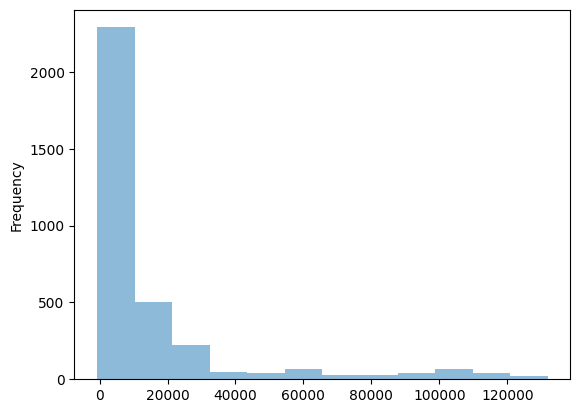

In [ ]:
df_EarnedPremDIR_F2 = df['EarnedPremDIR_F2']
ax4 = df_EarnedPremDIR_F2.plot.hist(bins=12, alpha=0.5)

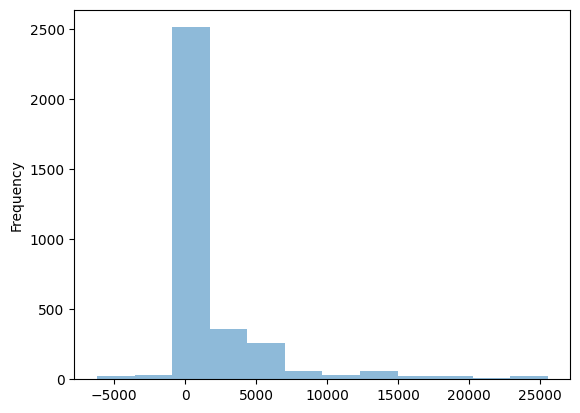

In [ ]:
df_EarnedPremCeded_F2 = df['EarnedPremCeded_F2']
ax5 = df_EarnedPremCeded_F2.plot.hist(bins=12, alpha=0.5)

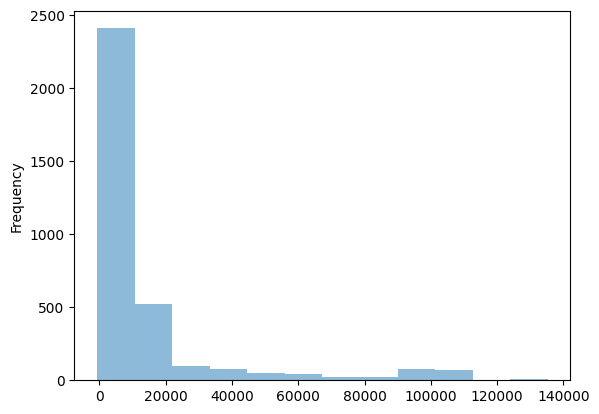

In [ ]:
df_EarnedPremNet_F2 = df['EarnedPremNet_F2']
ax6 = df_EarnedPremNet_F2.plot.hist(bins=12, alpha=0.5)

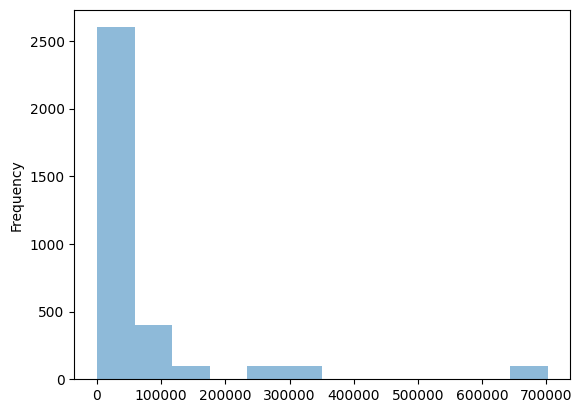

In [ ]:
df_PostedReserve97_F2 = df['PostedReserve97_F2']
ax7 = df_PostedReserve97_F2.plot.hist(bins=12, alpha=0.5)

En esta parte podemos observar como es la frecuencia de valores observados en las variables **IncurLoss_F2**, **CumPaidLoss_F2**, **BulkLoss_F2**, **EarnedPremDIR_F2**, **EarnedPremCeded_F2**,**EarnedPremNet_F2** y **PostedReserve97_F2** respectivamente.

In [9]:
# Run-off rectangles in the variable IncurLoss_F2 for all the entities
dictionary2 = {}
for i in range(34):
  df1 = df.loc[df['GRCODE']== Codes[i]]
  # df2 = df1.loc[df['DevelopmentYear'] <= 1997]

  raa_IncurLoss_F2 = cl.Triangle(
      df1,
      origin="AccidentYear",
      development="DevelopmentYear",
      columns="IncurLoss_F2",
      cumulative=False,
  )

  dictionary2[Names[i]] = raa_IncurLoss_F2

In [ ]:
# dictionary2['Nationwide Grp']

In [10]:
import numpy as np

#Dictionary of square matrices in the variable IncurLoss_F2 for all the entities
dictionary3 = {}
for i in range(34):
  df1 = dictionary2[Names[i]].to_frame()
  A = df1.to_numpy()
  A[np.isnan(A)] = 0
  A = np.array(A)

  A = A[0:10,0:10]
  dictionary3[Names[i]] = A

In [11]:
dictionary3['Overseas Partners Us Reins Co']

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [6., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Length of run-off rectangles dictionary : 34

 
 The mean of run-off rectangles is :  [[11181.         10151.          9506.55882353  9075.97058824
   8741.94117647  8034.91176471  7658.44117647  7082.64705882
   7088.88235294  6952.23529412]
 [10684.29411765 10715.47058824 10377.11764706  9654.58823529
   8758.02941176  8209.05882353  7823.23529412  7491.26470588
   7230.76470588  6982.20588235]
 [12406.29411765 12210.97058824 11491.17647059 10345.64705882
   9632.41176471  9112.29411765  8719.82352941  8247.38235294
   8119.64705882  7713.20588235]
 [13516.85294118 12968.5        12135.38235294 11502.5
  10945.5        10201.55882353  9718.91176471  9310.61764706
   9210.61764706  9286.97058824]
 [15276.38235294 14508.70588235 13082.76470588 12275.76470588
  11624.20588235 10632.5        10136.02941176  9821.67647059
   9650.91176471  9430.32352941]
 [15020.73529412 13954.23529412 13411.44117647 12598.41176471
  12043.11764706 11336.23529412 11196.82352941 11081.02941176
  10868.2941

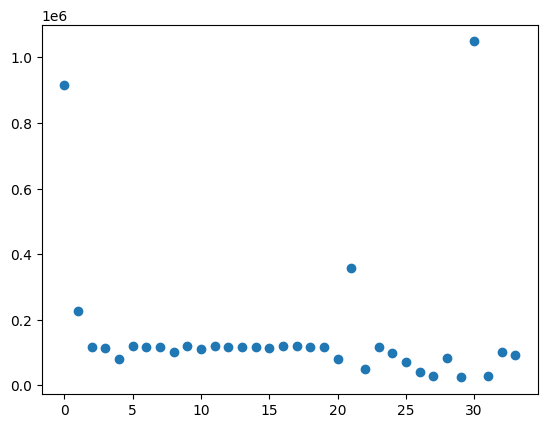

In [12]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

# This code makes a descriptive analysis of the data to analyze the quality of the data

print ("Length of run-off rectangles dictionary : %d" % len (dictionary3))

# Firstly we are going to found the mean of the run-off insurers rectangles

A = np.zeros((10,10))
for i in range(34):
  A = A + dictionary3[Names[i]]

B = A/34
print("\n \n The mean of run-off rectangles is : " , B)

# Secondly we are going to found the standard deviation of the run-off insurers rectangles

A = np.zeros((10,10))
C = np.zeros((10,10))
for i in range(34):
  C = np.square(dictionary3[Names[i]]-B)
  A = A + C

C = C/34
print("\n \n The variance of run-off rectangles is : " , C)

# In this part we analize the possible outliers in the data set using the Frobenius metric


x = []
for i in range(34):
  n = np.linalg.norm(dictionary3[Names[i]]-B, 'fro')
  x = np.append(x, [n])

print("\n \n Result of the distances : ", x)
print(len(x))

plt.scatter(np.arange(34), x)
plt.show()


Del gráfico anterior es posible apreciar que existen algunas aseguradoras que se encuentran distanciadas en mayor medida a la media que el resto de entidades. Por lo cual, este hecho nos brinda indicios de outliers en la base de datos ya que existen entidades aseguradoras que tienen un comportamiento considerablemente disimil al resto de entidades.


 
 Results of distances around insurer 0 Scpie Indemnity Co

 
 Result of the distances :  [      0.          706111.51587621 1031774.3523019  1027665.70867136
  882051.11167041 1034366.79930381 1032705.36908452 1033352.75380191
 1017127.60755522 1034366.74832334 1017158.61318921 1034099.32199862
 1033610.67272112 1033606.01296722 1033159.01852619 1024333.13472034
 1034082.36967951 1034352.12621718 1032606.34262966 1033181.9949733
  995651.61836106  583656.44007241  893583.20815188 1030325.55321316
 1015113.82419904  983487.3980606   954528.26828806  893555.67507067
 1000082.91846626  923767.60883947  240124.36631046  894824.67767994
 1016159.48439504 1009656.86468027]
34


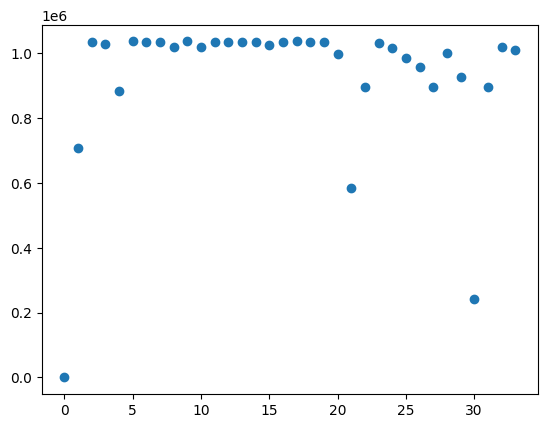


 
 Results of distances around insurer 1 Promutual Grp

 
 Result of the distances :  [706111.51587621      0.         335779.56514505 332646.64894449
 213077.68375876 338260.01151038 336757.09907439 337410.25561325
 323995.64994302 338259.79324182 327593.55005555 338042.28045764
 337581.10334851 337575.28414711 337201.27266515 328458.44852736
 338028.65406205 338242.02893638 336643.786944   337175.30523453
 300657.73144225 193347.16857766 214277.00717529 333884.00883091
 319856.72876305 292926.817364   262110.50834333 204956.00178087
 305166.72044147 231715.02452797 850338.08664731 206916.64719882
 320465.08865554 315304.06250634]
34


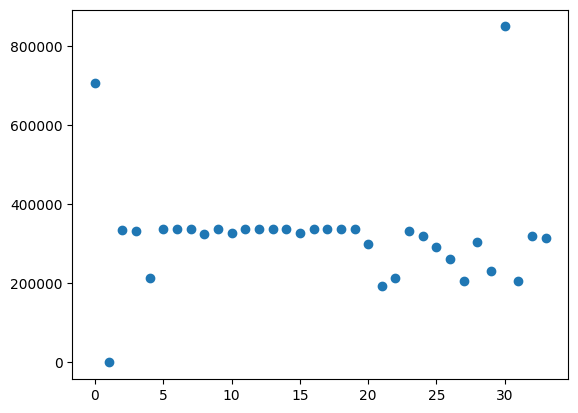


 
 Results of distances around insurer 2 Great Amer Grp

 
 Result of the distances :  [1031774.3523019   335779.56514505       0.           18710.75067976
  173888.1499039     4806.95724965    4440.04054036    4593.70569366
   29157.98019411    4807.97160973   56063.43618616    4873.17535084
    4039.20895721    4398.55089774    3341.17195008   26011.86871411
    4626.46560562    4808.34732523    3832.36337004    3962.99015896
   37277.83431209  472732.2990023   149072.85338049    8732.21873295
   19278.29670899   58750.66598771   79772.06354984  140595.54565846
   33484.62832405  109208.29055067 1163590.90166261  138700.55289363
   16882.62775755   25217.40208665]
34


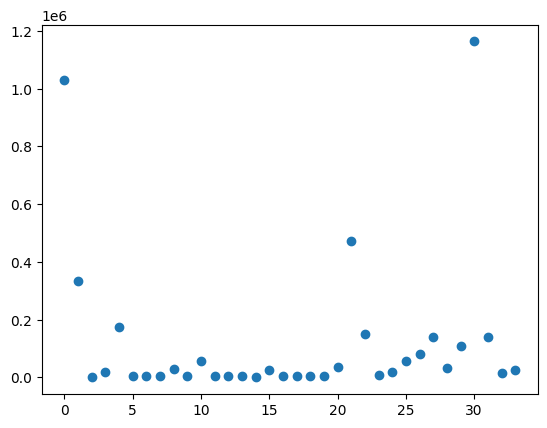


 
 Results of distances around insurer 3 Nationwide Grp

 
 Result of the distances :  [1027665.70867136  332646.64894449   18710.75067976       0.
  169118.13274158   18891.40521507   16579.93959579   17115.54261483
   27341.56052606   18887.63987374   40324.60591252   18193.07173074
   18714.14919252   17432.33119809   18329.8841513    31789.04941957
   18598.94230864   18891.49631448   17336.77034514   17055.10005834
   35940.98042625  466393.17259475  143235.53635882   20248.95239265
   23742.92170311   52498.10233713   76328.70274019  136619.46799047
   34509.50001087  106730.71195303 1160129.68466762  135445.79156991
   24494.70283551   24817.56803154]
34


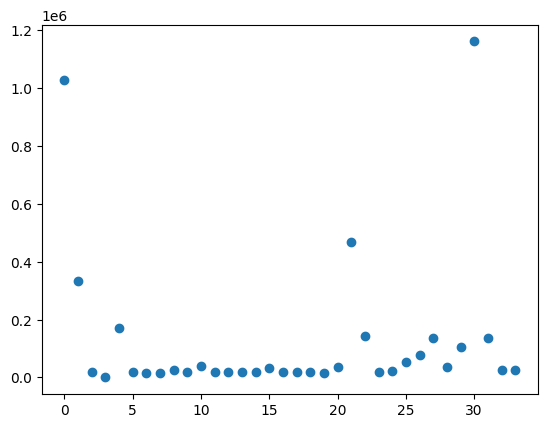


 
 Results of distances around insurer 4 Markel Corp Grp

 
 Result of the distances :  [ 882051.11167041  213077.68375876  173888.1499039   169118.13274158
       0.          177574.54259268  175350.76825894  176178.5875213
  152348.78247626  177574.23326598  163423.5715434   177254.87578343
  176675.22776552  176534.61324907  175903.36110206  174404.43010142
  177172.5004593   177568.10453739  175545.73597214  175847.59093601
  142133.64071887  311923.45802296   61584.77477429  175882.49244027
  157470.68114732  119900.94675606  106374.75486223   69231.26977024
  145805.16558408   98105.36286055 1007337.14279332   76346.92021293
  161006.51333719  152273.46743606]
34


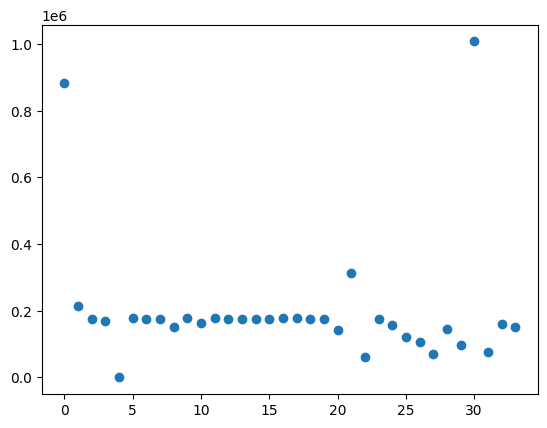


 
 Results of distances around insurer 5 Overseas Partners Us Reins Co

 
 Result of the distances :  [1.03436680e+06 3.38260012e+05 4.80695725e+03 1.88914052e+04
 1.77574543e+05 0.00000000e+00 3.00636358e+03 2.17456754e+03
 3.24410304e+04 7.93725393e+00 5.58733357e+04 8.11620601e+02
 1.39187966e+03 1.56979298e+03 2.00098976e+03 2.55667468e+04
 7.50673031e+02 5.92790013e+01 3.17621205e+03 2.29014388e+03
 3.99368569e+04 4.75748142e+05 1.52167623e+05 7.28937268e+03
 2.22643233e+04 6.20859202e+04 8.27141948e+04 1.43540583e+05
 3.64442629e+04 1.11719681e+05 1.16660850e+06 1.41480693e+05
 1.98628736e+04 2.82982174e+04]
34


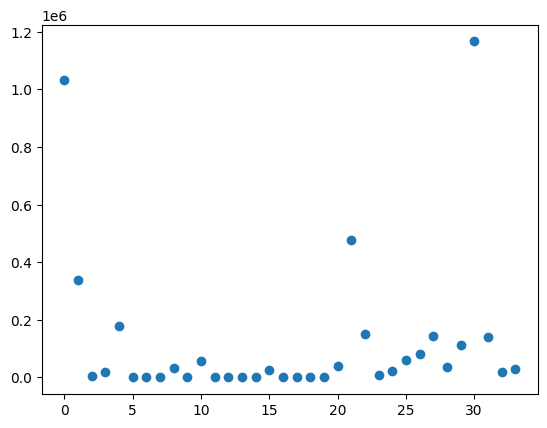


 
 Results of distances around insurer 6 Eastern Dentists Ins Co RRG

 
 Result of the distances :  [1032705.36908452  336757.09907439    4440.04054036   16579.93959579
  175350.76825894    3006.36358413       0.            1533.579473
   30402.84971841    3004.47749201   53706.8667025     2480.78777811
    2886.20771948    1784.0823972     2440.9846374    25733.10999471
    2545.18211529    3007.27916895    2636.98331432    1517.2966091
   38167.6999962   473657.28299267  150121.07199524    7863.07624279
   20507.17849925   59703.05955309   80885.6811123   141721.37738888
   34861.22849241  110163.25356942 1164951.26193931  139792.38556874
   18752.70268521   26316.83962789]
34


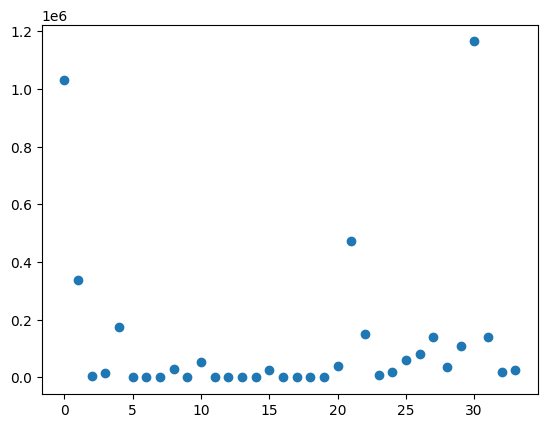


 
 Results of distances around insurer 7 American Assoc Of Othodontists RRG

 
 Result of the distances :  [1.03335275e+06 3.37410256e+05 4.59370569e+03 1.71155426e+04
 1.76178588e+05 2.17456754e+03 1.53357947e+03 0.00000000e+00
 3.09331966e+04 2.17207113e+03 5.40603531e+04 1.56332402e+03
 2.27806299e+03 1.05685571e+03 1.91464879e+03 2.56590794e+04
 1.74988628e+03 2.17562083e+03 2.58351911e+03 1.38005978e+03
 3.87812467e+04 4.74430722e+05 1.50806623e+05 7.60688938e+03
 2.13825956e+04 6.04746101e+04 8.15299334e+04 1.42414770e+05
 3.54877130e+04 1.10717217e+05 1.16560592e+06 1.40427932e+05
 1.93053040e+04 2.70367974e+04]
34


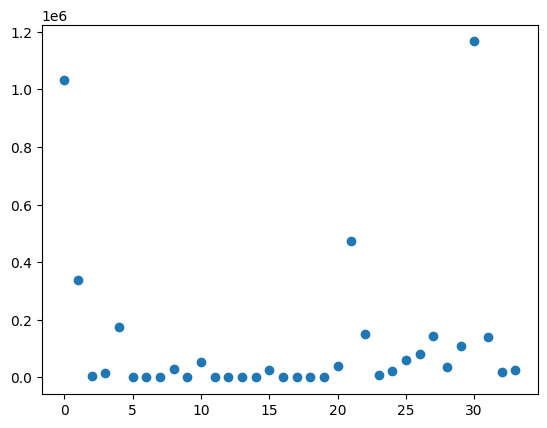


 
 Results of distances around insurer 8 Controlled Risk Ins Co Of VT Inc

 
 Result of the distances :  [1017127.60755522  323995.64994302   29157.98019411   27341.56052606
  152348.78247626   32441.0303628    30402.84971841   30933.19655322
       0.           32441.27028956   49064.17332433   32055.49948137
   31685.45297136   31372.75450132   30667.90340079   41305.87395274
   32038.37656624   32442.56760801   31082.5905291    30544.25870765
   30182.08534876  454441.91753732  131793.60122555   33251.34031885
   26364.00847747   39049.9525864    66536.20378411  126072.03611428
   30108.73379935   97660.51188684 1147520.62095415  124612.13814874
   28157.94898426   25813.7948973 ]
34


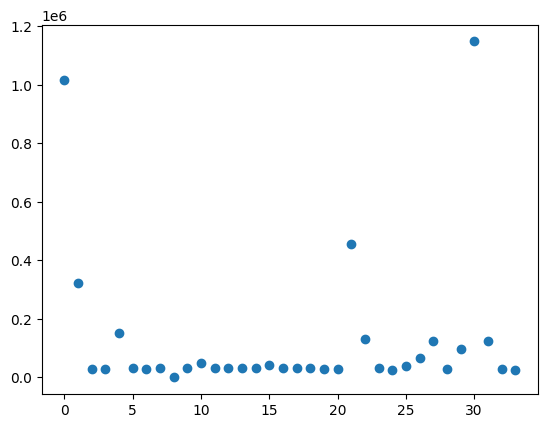


 
 Results of distances around insurer 9 Texas Medical Ins Co

 
 Result of the distances :  [1.03436675e+06 3.38259793e+05 4.80797161e+03 1.88876399e+04
 1.77574233e+05 7.93725393e+00 3.00447749e+03 2.17207113e+03
 3.24412703e+04 0.00000000e+00 5.58704897e+04 8.08760162e+02
 1.39308291e+03 1.56646130e+03 2.00183591e+03 2.55667467e+04
 7.50147319e+02 5.92030405e+01 3.17523952e+03 2.28804108e+03
 3.99366600e+04 4.75747552e+05 1.52167290e+05 7.28937206e+03
 2.22643593e+04 6.20851646e+04 8.27139826e+04 1.43540250e+05
 3.64442883e+04 1.11719739e+05 1.16660865e+06 1.41480727e+05
 1.98634408e+04 2.82977611e+04]
34


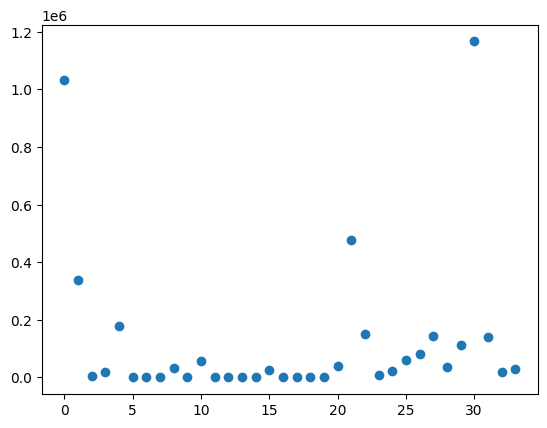


 
 Results of distances around insurer 10 MCIC VT Inc RRG

 
 Result of the distances :  [1017158.61318921  327593.55005555   56063.43618616   40324.60591252
  163423.5715434    55873.33574255   53706.8667025    54060.35307876
   49064.17332433   55870.48965241       0.           55068.31747021
   55734.31551567   54592.09179909   55233.22609625   61445.00076491
   55486.80645883   55873.36654436   54146.47148245   54365.62643804
   54495.20984454  453428.03944286  134291.56831313   56346.82359282
   54998.94274438   54656.88965721   79645.95212564  133158.28874689
   56367.72265224  107125.94162947 1150720.80300957  132658.4301279
   56887.37031187   49225.90221621]
34


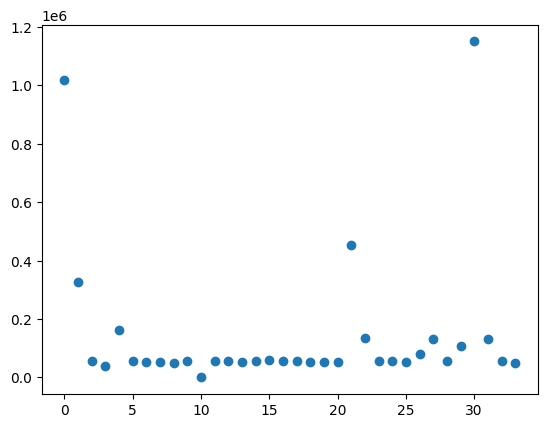


 
 Results of distances around insurer 11 Franklin Cas Ins Co RRG

 
 Result of the distances :  [1.03409932e+06 3.38042280e+05 4.87317535e+03 1.81930717e+04
 1.77254876e+05 8.11620601e+02 2.48078778e+03 1.56332402e+03
 3.20554995e+04 8.08760162e+02 5.50683175e+04 0.00000000e+00
 1.53288519e+03 1.02041266e+03 1.89294849e+03 2.55796247e+04
 7.94834574e+02 8.13738287e+02 2.80906515e+03 1.84954832e+03
 3.96299825e+04 4.75388187e+05 1.51778709e+05 7.33441272e+03
 2.20869755e+04 6.16292790e+04 8.24028409e+04 1.43243071e+05
 3.61990931e+04 1.11456099e+05 1.16636346e+06 1.41201626e+05
 1.97783321e+04 2.79275665e+04]
34


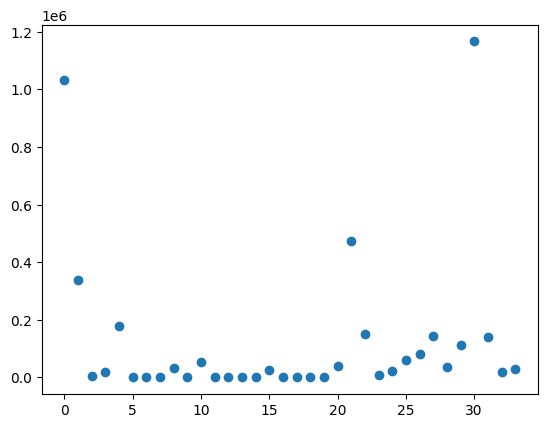


 
 Results of distances around insurer 12 Homestead Ins Co

 
 Result of the distances :  [1033610.67272112  337581.10334851    4039.20895721   18714.14919252
  176675.22776552    1391.87966434    2886.20771948    2278.06299298
   31685.45297136    1393.08291211   55734.31551567    1532.88518813
       0.            1757.96160368    1422.71887596   25521.74369043
    1440.62451735    1394.54472858    2796.02360505    2108.21061566
   39197.29449847  474947.76875252  151319.46675825    7304.20392651
   21427.12353537   61277.84859964   81860.46609933  142761.90409209
   35666.71281461  110975.99955846 1165769.74110285  140649.95409171
   18970.25521705   27420.3396952 ]
34


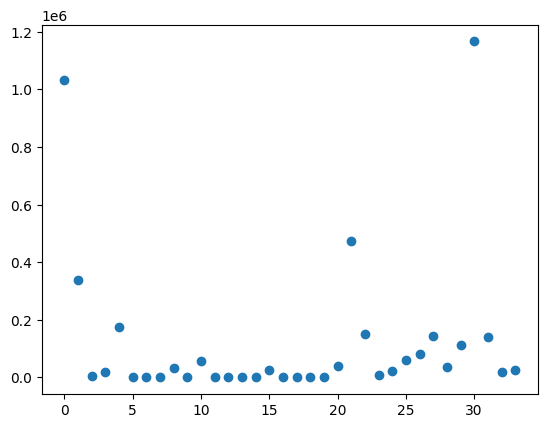


 
 Results of distances around insurer 13 Campmed Cas & Ind Co Inc MD

 
 Result of the distances :  [1.03360601e+06 3.37575284e+05 4.39855090e+03 1.74323312e+04
 1.76534613e+05 1.56979298e+03 1.78408240e+03 1.05685571e+03
 3.13727545e+04 1.56646130e+03 5.45920918e+04 1.02041266e+03
 1.75796160e+03 0.00000000e+00 1.75157472e+03 2.56148966e+04
 1.32993308e+03 1.57095385e+03 2.42346756e+03 1.07934100e+03
 3.90714317e+04 4.74737976e+05 1.51144401e+05 7.45649623e+03
 2.15214963e+04 6.08873769e+04 8.18186596e+04 1.42670553e+05
 3.56787094e+04 1.10993934e+05 1.16583919e+06 1.40688995e+05
 1.93433284e+04 2.72971828e+04]
34


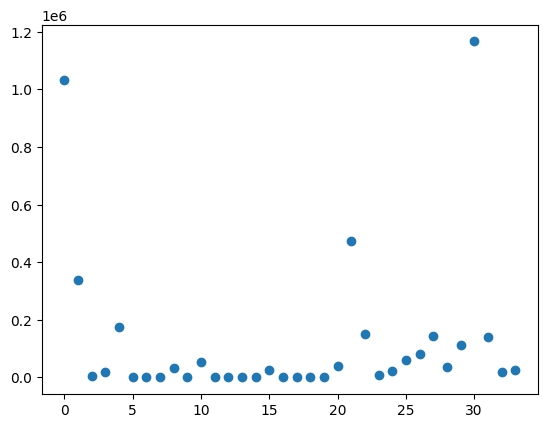


 
 Results of distances around insurer 14 Community Blood Cntr Exch RRG

 
 Result of the distances :  [1033159.01852619  337201.27266515    3341.17195008   18329.8841513
  175903.36110206    2000.9897551     2440.9846374     1914.64879286
   30667.90340079    2001.83590736   55233.22609625    1892.94849375
    1422.71887596    1751.57472007       0.           25625.39677742
    1733.91406938    2003.16799096    2493.95649521    1738.94824535
   38585.57197969  474344.45517577  150695.89941004    7528.38110087
   20986.06718754   60435.26672399   81314.70590859  142210.83975211
   35103.98812101  110487.15698668 1165252.3838757   140154.73220338
   18623.71053254   26854.06058681]
34


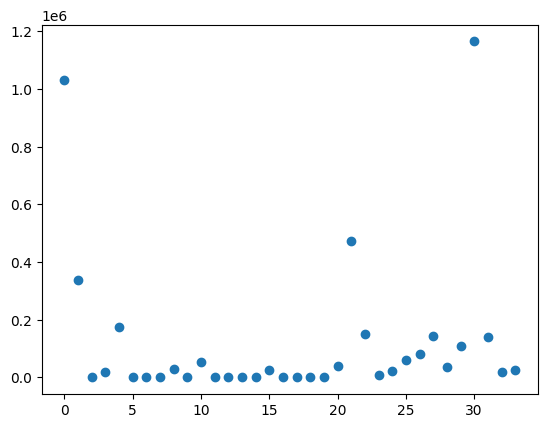


 
 Results of distances around insurer 15 Underwriters At Lloyds London

 
 Result of the distances :  [1024333.13472034  328458.44852736   26011.86871411   31789.04941957
  174404.43010142   25566.74684038   25733.10999471   25659.07940671
   41305.87395274   25566.74666437   61445.00076491   25579.62470405
   25521.74369043   25614.8965643    25625.39677742       0.
   25577.76342842   25546.66365692   25757.23391593   25668.67988425
   38031.77209913  468137.16183828  146411.00762238   22000.29977068
   30180.43031502   63540.53964203   76800.76815371  136206.67160973
   37610.47846013  102560.77691301 1158148.92819533  133397.17227513
   27176.26464399   33533.98780342]
34


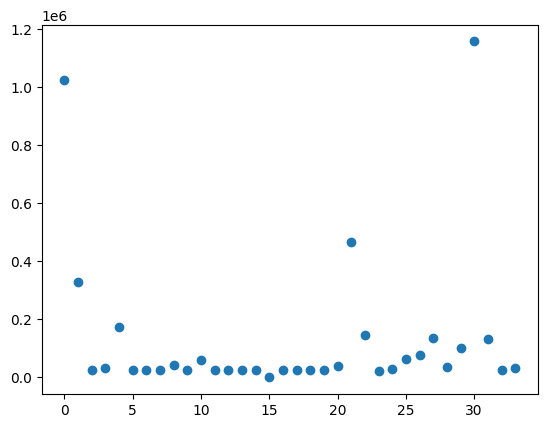


 
 Results of distances around insurer 16 NCMIC Ins Co

 
 Result of the distances :  [1.03408237e+06 3.38028654e+05 4.62646561e+03 1.85989423e+04
 1.77172500e+05 7.50673031e+02 2.54518212e+03 1.74988628e+03
 3.20383766e+04 7.50147319e+02 5.54868065e+04 7.94834574e+02
 1.44062452e+03 1.32993308e+03 1.73391407e+03 2.55777634e+04
 0.00000000e+00 7.52962150e+02 2.91204550e+03 1.99168948e+03
 3.96075869e+04 4.75392167e+05 1.51814427e+05 7.32791867e+03
 2.19752616e+04 6.16418916e+04 8.23963363e+04 1.43229490e+05
 3.61705002e+04 1.11427616e+05 1.16632967e+06 1.41188029e+05
 1.96819292e+04 2.79484478e+04]
34


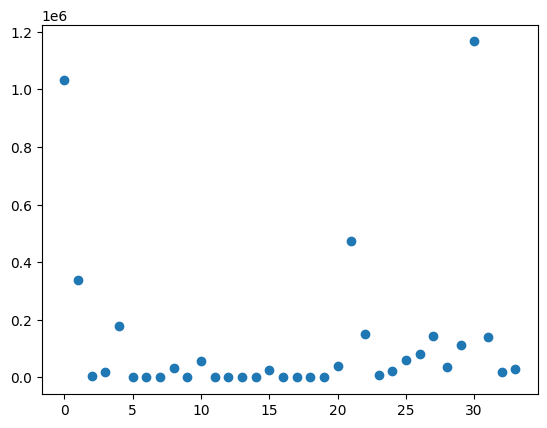


 
 Results of distances around insurer 17 National American Ins Co

 
 Result of the distances :  [1.03435213e+06 3.38242029e+05 4.80834733e+03 1.88914963e+04
 1.77568105e+05 5.92790013e+01 3.00727917e+03 2.17562083e+03
 3.24425676e+04 5.92030405e+01 5.58733665e+04 8.13738287e+02
 1.39454473e+03 1.57095385e+03 2.00316799e+03 2.55466637e+04
 7.52962150e+02 0.00000000e+00 3.17731286e+03 2.29135091e+03
 3.99217393e+04 4.75737334e+05 1.52158851e+05 7.26202589e+03
 2.22629869e+04 6.20838220e+04 8.27010569e+04 1.43528732e+05
 3.64347944e+04 1.11702791e+05 1.16660023e+06 1.41469135e+05
 1.98559075e+04 2.82951535e+04]
34


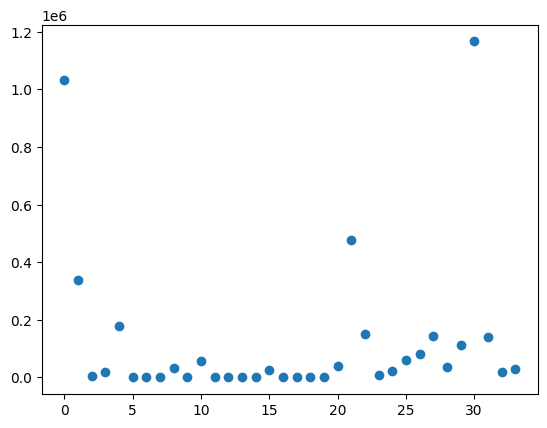


 
 Results of distances around insurer 18 Michigan Professional Ins Exch

 
 Result of the distances :  [1032606.34262966  336643.786944      3832.36337004   17336.77034514
  175545.73597214    3176.21205211    2636.98331432    2583.5191116
   31082.5905291     3175.23951852   54146.47148245    2809.06514698
    2796.02360505    2423.46755703    2493.95649521   25757.23391593
    2912.04550102    3177.31285838       0.            2590.74506658
   38271.47760409  473694.88909951  149929.23460753    7950.82115256
   20542.30184278   59823.14770221   80753.10958719  141596.46993481
   34633.35748956  110022.34851156 1164727.29949589  139665.37357556
   18198.70580563   25803.9078242 ]
34


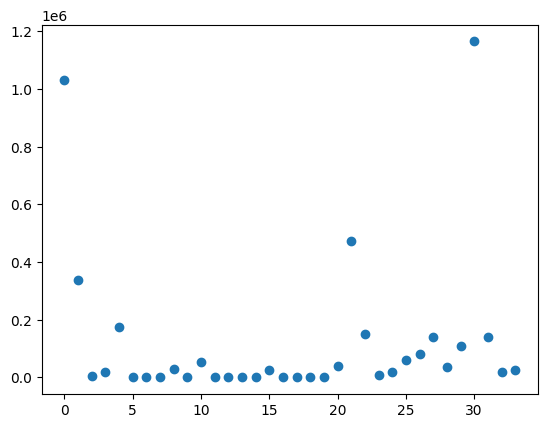


 
 Results of distances around insurer 19 Nichido Fire & Marine Ins Co Ltd

 
 Result of the distances :  [1.03318199e+06 3.37175305e+05 3.96299016e+03 1.70551001e+04
 1.75847591e+05 2.29014388e+03 1.51729661e+03 1.38005978e+03
 3.05442587e+04 2.28804108e+03 5.43656264e+04 1.84954832e+03
 2.10821062e+03 1.07934100e+03 1.73894825e+03 2.56686799e+04
 1.99168948e+03 2.29135091e+03 2.59074507e+03 0.00000000e+00
 3.85310913e+04 4.74184799e+05 1.50638855e+05 7.64079374e+03
 2.10179941e+04 6.02124662e+04 8.13255135e+04 1.42177004e+05
 3.51584145e+04 1.10585763e+05 1.16537220e+06 1.40225944e+05
 1.89849343e+04 2.68487248e+04]
34


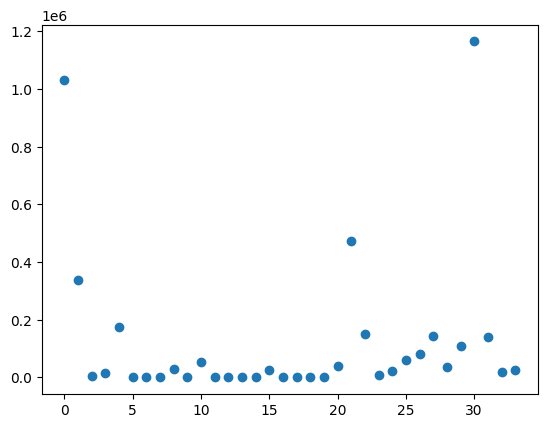


 
 Results of distances around insurer 20 Texas Hospital Ins Exch

 
 Result of the distances :  [ 995651.61836106  300657.73144225   37277.83431209   35940.98042625
  142133.64071887   39936.85687432   38167.6999962    38781.24671797
   30182.08534876   39936.65995048   54495.20984454   39629.98247539
   39197.29449847   39071.43169888   38585.57197969   38031.77209913
   39607.58686161   39921.73930329   38271.47760409   38531.09131597
       0.          436987.94482342  115662.15740682   36689.80104879
   24768.60147445   33394.25682659   45487.46779059  105223.91815552
   13685.81422496   73266.23496536 1128391.08571054  103319.78973072
   24642.6673678    21341.83480866]
34


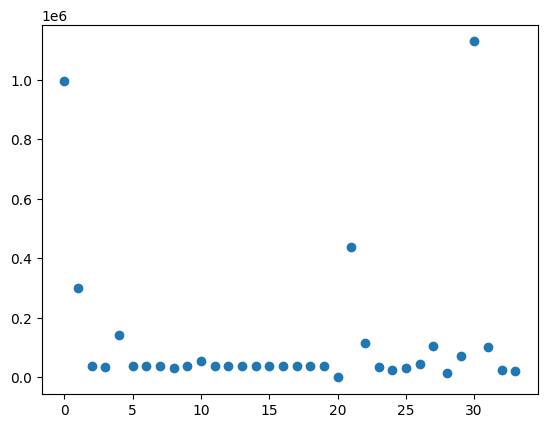


 
 Results of distances around insurer 21 State Volunteer Mut Ins Co

 
 Result of the distances :  [583656.44007241 193347.16857766 472732.2990023  466393.17259475
 311923.45802296 475748.14183557 473657.28299267 474430.72226406
 454441.91753732 475747.55163532 453428.03944286 475388.18696934
 474947.76875252 474737.97566236 474344.45517577 468137.16183828
 475392.16683282 475737.33423392 473694.88909951 474184.79857646
 436987.94482342      0.         329319.8493547  472612.4938467
 455684.69805996 419054.05589017 395386.32758228 334634.28144917
 441163.60587428 370033.41536002 712149.84440074 339042.06722618
 458021.23424575 449526.45544617]
34


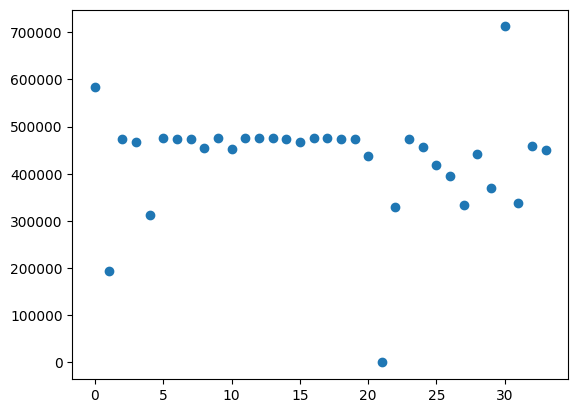


 
 Results of distances around insurer 22 MHA Ins Co

 
 Result of the distances :  [ 893583.20815188  214277.00717529  149072.85338049  143235.53635882
   61584.77477429  152167.62332704  150121.07199524  150806.62335919
  131793.60122555  152167.2899739   134291.56831313  151778.70876707
  151319.46675825  151144.40089861  150695.89941004  146411.00762238
  151814.42747974  152158.85130678  149929.23460753  150638.85460929
  115662.15740682  329319.8493547        0.          149506.80850383
  132607.00633451   96485.39131392   75365.03583227   37403.5690543
  118961.41917025   63705.48171076 1022447.56377479   41679.76391488
  134884.2593374   125204.72224721]
34


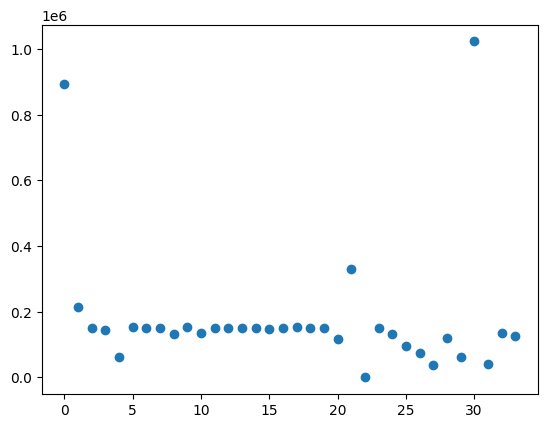


 
 Results of distances around insurer 23 Health Care Ind Inc

 
 Result of the distances :  [1030325.55321316  333884.00883091    8732.21873295   20248.95239265
  175882.49244027    7289.37267534    7863.07624279    7606.8893774
   33251.34031885    7289.372058     56346.82359282    7334.41272359
    7304.20392651    7456.49622812    7528.38110087   22000.29977068
    7327.91866767    7262.02588814    7950.82115256    7640.79374149
   36689.80104879  472612.4938467   149506.80850383       0.
   21737.04427929   61214.42865861   79179.48385156  140222.97650171
   34056.5942807   107537.1853035  1163280.42223791  137922.39937371
   18271.50497359   27268.28043717]
34


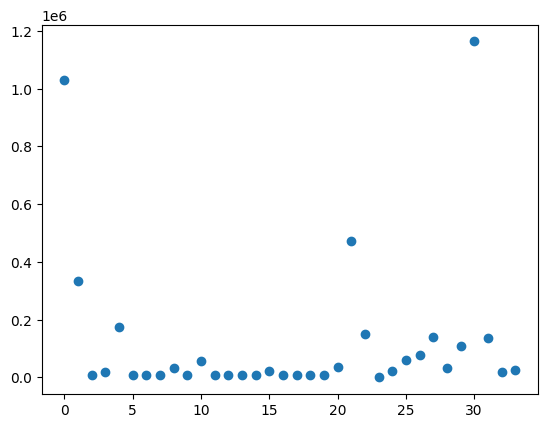


 
 Results of distances around insurer 24 National Guardian RRG Inc

 
 Result of the distances :  [1015113.82419904  319856.72876305   19278.29670899   23742.92170311
  157470.68114732   22264.32334476   20507.17849925   21382.5956329
   26364.00847747   22264.3592542    54998.94274438   22086.97552858
   21427.12353537   21521.49627698   20986.06718754   30180.43031502
   21975.26163667   22262.98686161   20542.30184278   21017.99412408
   24768.60147445  455684.69805996  132607.00633451   21737.04427929
       0.           44239.60677945   64476.45481104  123725.50893409
   19557.49022753   94188.49486535 1146388.7834849   122063.64490298
    8793.50589924   12415.35758647]
34


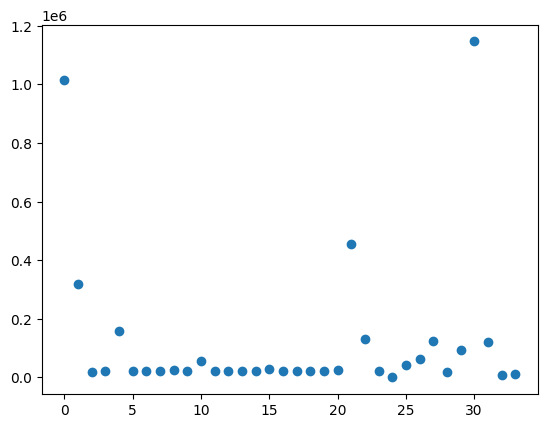


 
 Results of distances around insurer 25 Preferred Professional Ins Co

 
 Result of the distances :  [ 983487.3980606   292926.817364     58750.66598771   52498.10233713
  119900.94675606   62085.9202074    59703.05955309   60474.61007729
   39049.9525864    62085.16459671   54656.88965721   61629.27903197
   61277.84859964   60887.3768691    60435.26672399   63540.53964203
   61641.89156734   62083.82204729   59823.14770221   60212.46624247
   33394.25682659  419054.05589017   96485.39131392   61214.42865861
   44239.60677945       0.           40865.78286293   92505.14439208
   35116.7237367    70912.73976515 1113119.8988348    92916.80388929
   47756.3826729    37339.73497496]
34


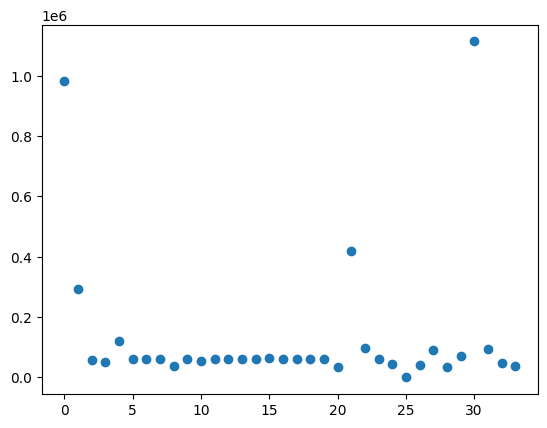


 
 Results of distances around insurer 26 Medical Mut Ins Co Of ME

 
 Result of the distances :  [ 954528.26828806  262110.50834333   79772.06354984   76328.70274019
  106374.75486223   82714.19482169   80885.6811123    81529.93340485
   66536.20378411   82713.98259061   79645.95212564   82402.84086729
   81860.46609933   81818.6595527    81314.70590859   76800.76815371
   82396.33633239   82701.05690377   80753.10958719   81325.51349976
   45487.46779059  395386.32758228   75365.03583227   79179.48385156
   64476.45481104   40865.78286293       0.           65482.63939396
   50095.76745594   37829.88242118 1087058.61978506   63333.9785897
   65437.91663096   57862.86267547]
34


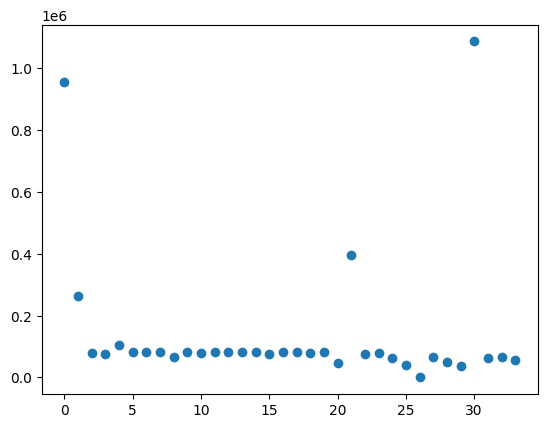


 
 Results of distances around insurer 27 Utah Medical Ins Assoc

 
 Result of the distances :  [ 893555.67507067  204956.00178087  140595.54565846  136619.46799047
   69231.26977024  143540.58284332  141721.37738888  142414.76982041
  126072.03611428  143540.25048048  133158.28874689  143243.07142407
  142761.90409209  142670.55349651  142210.83975211  136206.67160973
  143229.490263    143528.73221415  141596.46993481  142177.00416031
  105223.91815552  334634.28144917   37403.5690543   140222.97650171
  123725.50893409   92505.14439208   65482.63939396       0.
  108788.07629975   43648.46666264 1025244.88556588   20521.718008
  125550.17098754  117831.66490804]
34


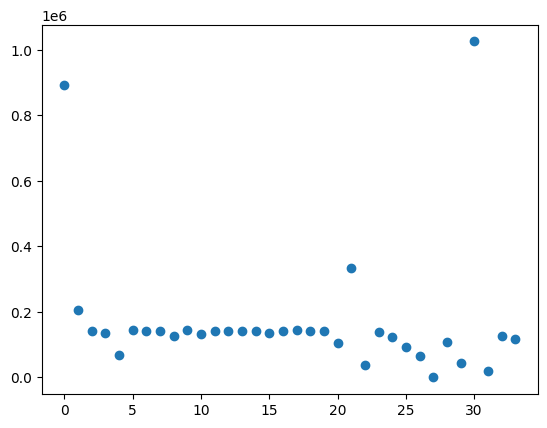


 
 Results of distances around insurer 28 Seguros Triples Inc

 
 Result of the distances :  [1000082.91846626  305166.72044147   33484.62832405   34509.50001087
  145805.16558408   36444.26289555   34861.22849241   35487.71300042
   30108.73379935   36444.28829049   56367.72265224   36199.09305494
   35666.71281461   35678.7093937    35103.98812101   37610.47846013
   36170.50019007   36434.79441413   34633.35748956   35158.41445515
   13685.81422496  441163.60587428  118961.41917025   34056.5942807
   19557.49022753   35116.7237367    50095.76745594  108788.07629975
       0.           78872.78827961 1131569.96537907  107467.63714254
   20075.59359023   16565.86677479]
34


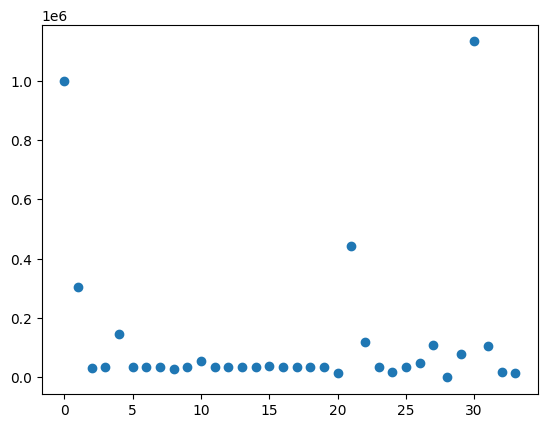


 
 Results of distances around insurer 29 Dentists Ins Co

 
 Result of the distances :  [ 923767.60883947  231715.02452797  109208.29055067  106730.71195303
   98105.36286055  111719.68123388  110163.25356942  110717.21746413
   97660.51188684  111719.73879311  107125.94162947  111456.09900315
  110975.99955846  110993.9336045   110487.15698668  102560.77691301
  111427.61567493  111702.79065896  110022.34851156  110585.76259176
   73266.23496536  370033.41536002   63705.48171076  107537.1853035
   94188.49486535   70912.73976515   37829.88242118   43648.46666264
   78872.78827961       0.         1058613.67582466   38322.58788234
   94367.41759209   88722.13877607]
34


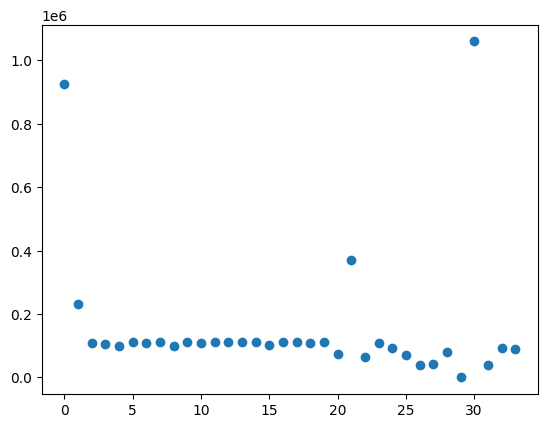


 
 Results of distances around insurer 30 Physicians Recip Insurers

 
 Result of the distances :  [ 240124.36631046  850338.08664731 1163590.90166261 1160129.68466762
 1007337.14279332 1166608.49780978 1164951.26193931 1165605.91761538
 1147520.62095415 1166608.65451916 1150720.80300957 1166363.46325577
 1165769.74110285 1165839.19398517 1165252.3838757  1158148.92819533
 1166329.67416936 1166600.23353161 1164727.29949589 1165372.2005973
 1128391.08571054  712149.84440074 1022447.56377479 1163280.42223791
 1146388.7834849  1113119.8988348  1087058.61978506 1025244.88556588
 1131569.96537907 1058613.67582466       0.         1026711.17103643
 1147734.18532951 1140821.07006489]
34


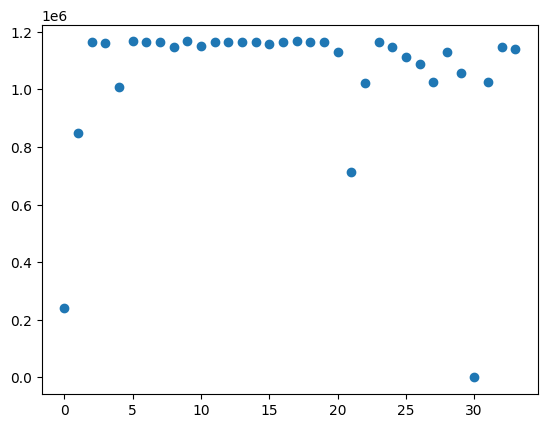


 
 Results of distances around insurer 31 Louisiana Med Mut Ins Co

 
 Result of the distances :  [ 894824.67767994  206916.64719882  138700.55289363  135445.79156991
   76346.92021293  141480.69257323  139792.38556874  140427.93201141
  124612.13814874  141480.72706203  132658.4301279   141201.6255041
  140649.95409171  140688.99469752  140154.73220338  133397.17227513
  141188.02899325  141469.13505426  139665.37357556  140225.94385491
  103319.78973072  339042.06722618   41679.76391488  137922.39937371
  122063.64490298   92916.80388929   63333.9785897    20521.718008
  107467.63714254   38322.58788234 1026711.17103643       0.
  123343.18570152  116283.51201697]
34


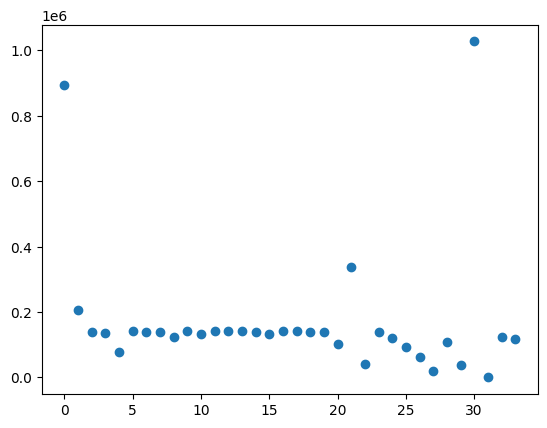


 
 Results of distances around insurer 32 Clinic Mut Ins Co RRG

 
 Result of the distances :  [1016159.48439504  320465.08865554   16882.62775755   24494.70283551
  161006.51333719   19862.87355848   18752.70268521   19305.30403801
   28157.94898426   19863.44076438   56887.37031187   19778.33208337
   18970.25521705   19343.32835889   18623.71053254   27176.26464399
   19681.92917374   19855.90753403   18198.70580563   18984.93431645
   24642.6673678   458021.23424575  134884.2593374    18271.50497359
    8793.50589924   47756.3826729    65437.91663096  125550.17098754
   20075.59359023   94367.41759209 1147734.18532951  123343.18570152
       0.           14376.46980312]
34


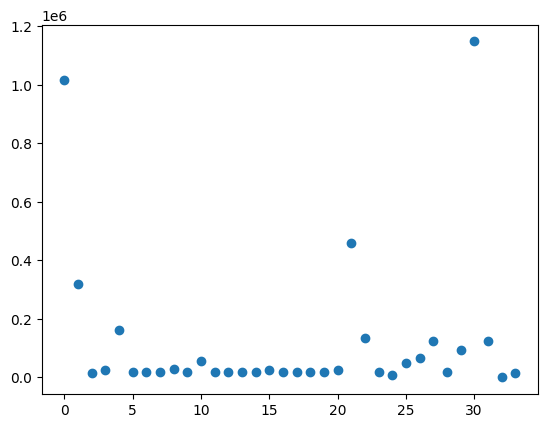


 
 Results of distances around insurer 33 California Healthcare Ins Co Inc

 
 Result of the distances :  [1009656.86468027  315304.06250634   25217.40208665   24817.56803154
  152273.46743606   28298.21739969   26316.83962789   27036.79744348
   25813.7948973    28297.76105984   49225.90221621   27927.56648904
   27420.3396952    27297.18278504   26854.06058681   33533.98780342
   27948.44779232   28295.15354261   25803.9078242    26848.72475556
   21341.83480866  449526.45544617  125204.72224721   27268.28043717
   12415.35758647   37339.73497496   57862.86267547  117831.66490804
   16565.86677479   88722.13877607 1140821.07006489  116283.51201697
   14376.46980312       0.        ]
34


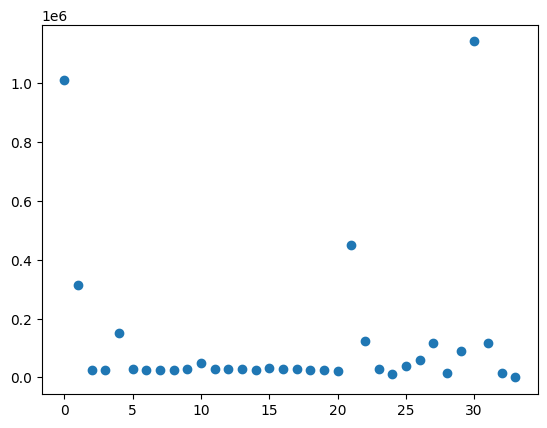

In [14]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

# In this part we analize the possible modes in the data set using the Frobenius metric

y = []
for j in range(34):
  y = []

  for i in range(34):
    n = np.linalg.norm(dictionary3[Names[i]]-dictionary3[Names[j]], 'fro')
    y = np.append(y, [n])

  print ("\n \n Results of distances around insurer %d" % j, Names[j])
  print("\n \n Result of the distances : ", y)
  print(len(y))
  plt.scatter(np.arange(34), y)
  plt.show()

In [ ]:
A = np.zeros((10,10))
B = np.ones((10,10))
A
B
print(np.square(B+B))

[[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]]


In [ ]:
# Run-off upper triangles in the variable IncurLoss_F2 for all the entities
dictionary1 = {}
for i in range(34):
  df1 = df.loc[df['GRCODE']== Codes[i]]
  df2 = df1.loc[df['DevelopmentYear'] <= 1997]

  raa_IncurLoss_F2 = cl.Triangle(
      df2,
      origin="AccidentYear",
      development="DevelopmentYear",
      columns="IncurLoss_F2",
      cumulative=False,
  )

  dictionary1[Names[i]] = raa_IncurLoss_F2

In [ ]:
dictionary1['Nationwide Grp']

,12,24,36,48,60,72,84,96,108,120
1988,,,,,,,,,,
1989,,,,,,,,,,
1990,,,,,,,,,,
1991,,,,,,,,,,
1992,,,,,,,,,,
1993,,,,,,,,,,
1994,,,,,,,,,,
1995,,,44.00,,,,,,,
1996,,,,,,,,,,
1997,807.00,,,,,,,,,


In [ ]:
dictionary1['Nationwide Grp'].plot

<bound method TrianglePandas.plot of         12   24    36   48   60   72   84   96   108  120
1988    NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1989    NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1990    NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1991    NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1992    NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1993    NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1994    NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1995    NaN  NaN  44.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1996    NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1997  807.0  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN>

In [ ]:
df1 = dictionary1['Nationwide Grp'].to_frame()

In [ ]:
df1.to_numpy()

array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  44.,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [807.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan]])

<Axes: >

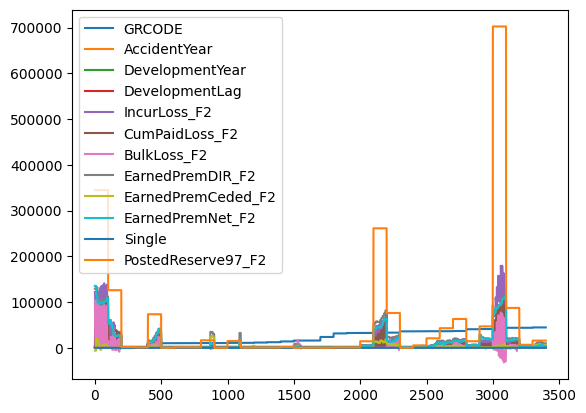

In [ ]:
df.plot()

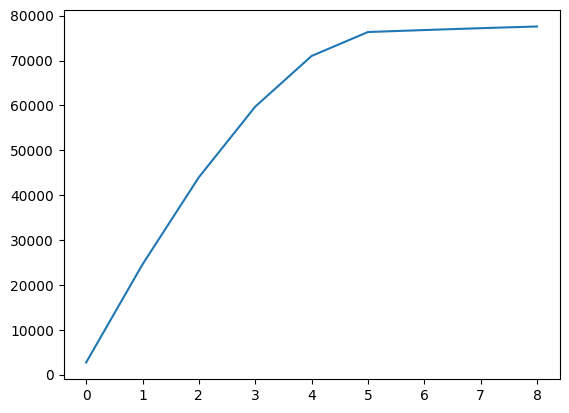

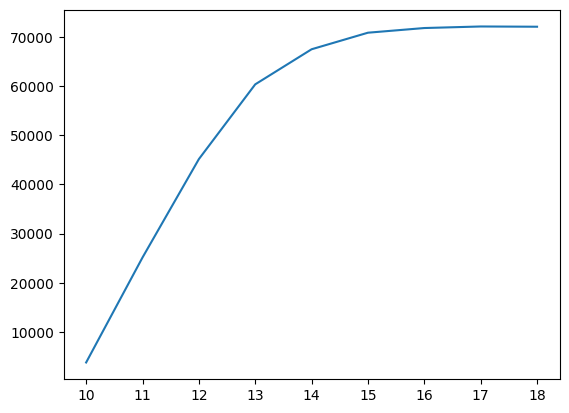

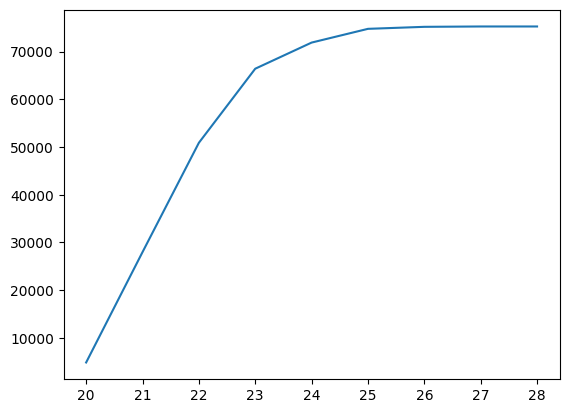

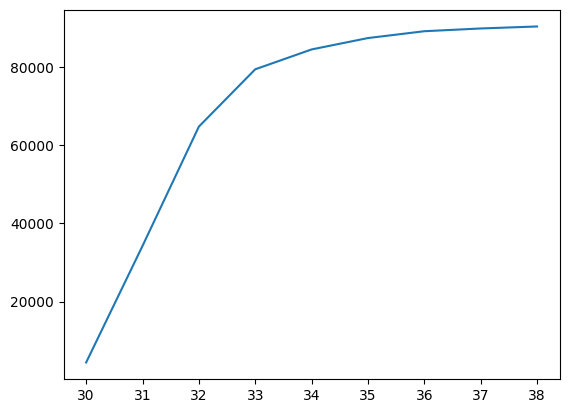

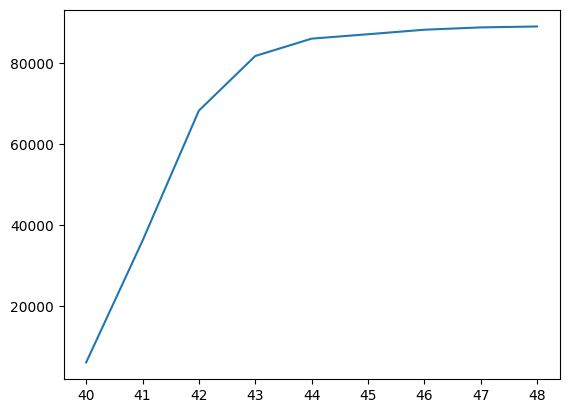

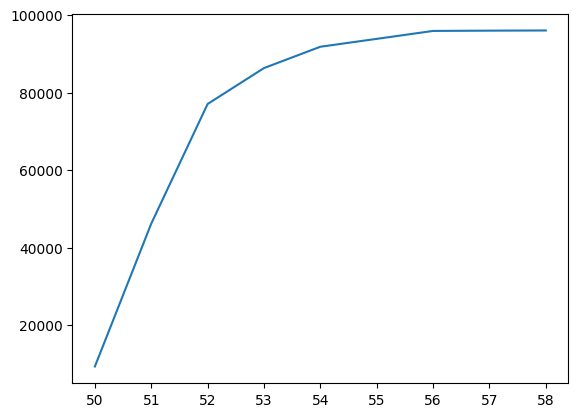

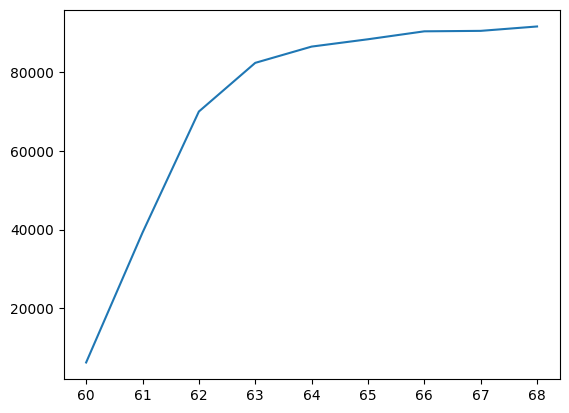

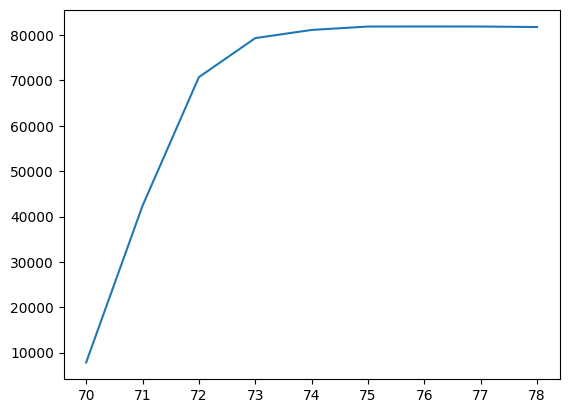

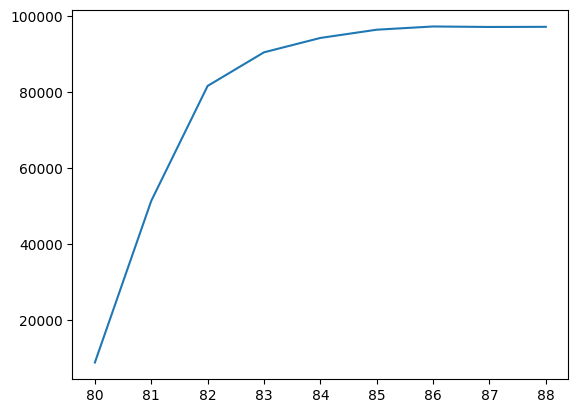

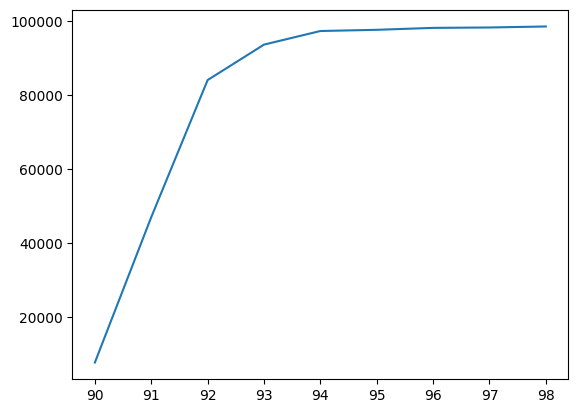

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

f1 = df['CumPaidLoss_F2']
# f2 = f1[0:10]
# f2.plot()

for i in range(10):
  f2 = f1[10*i:(10*i)+9]
  f2.plot()
  plt.show()


Como es de esperarse las pérdidas pagadas acumuladas y gastos asignados al final del año son una función creciente para cada uno de los años de accidentalidad por lo cual esta variable es coherente con lo que trata de representar y por ende da un buen indicio de la calidad de los datos.

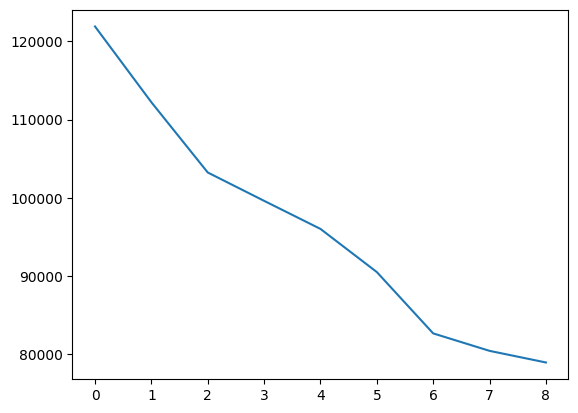

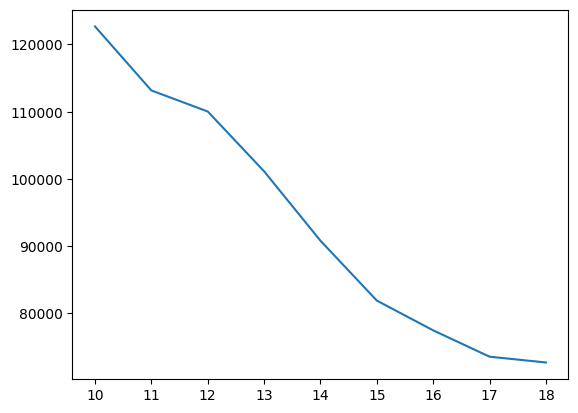

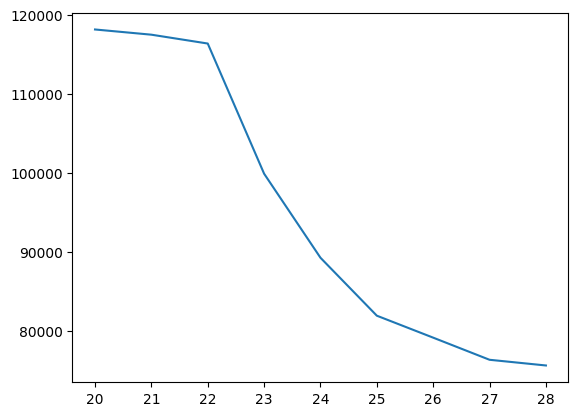

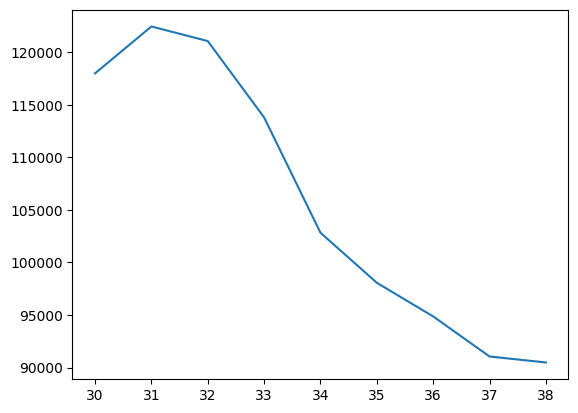

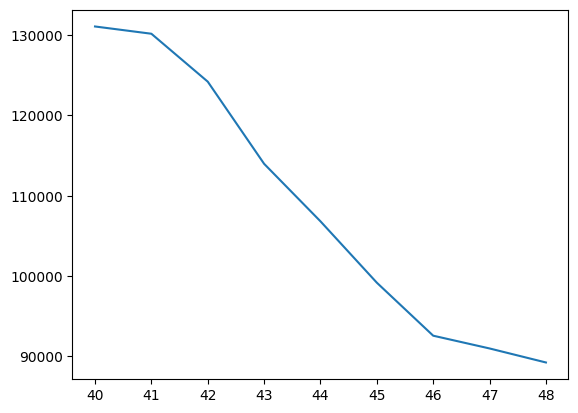

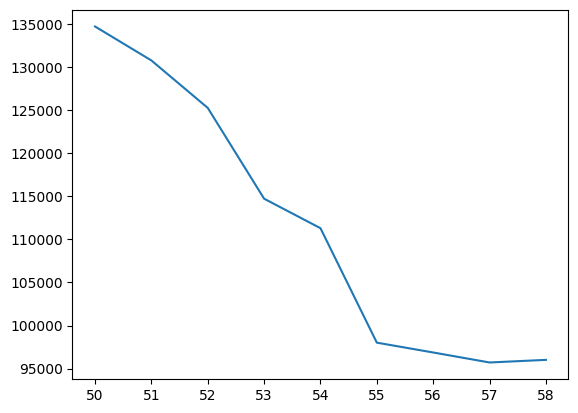

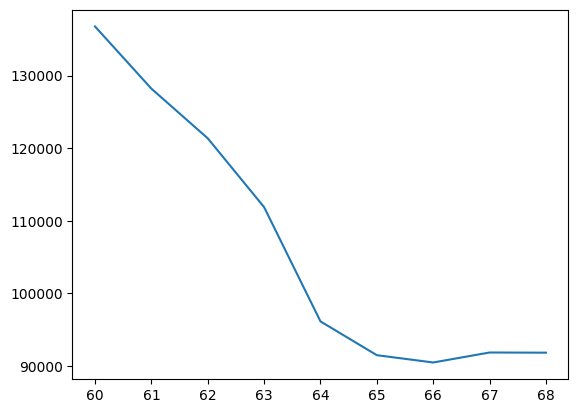

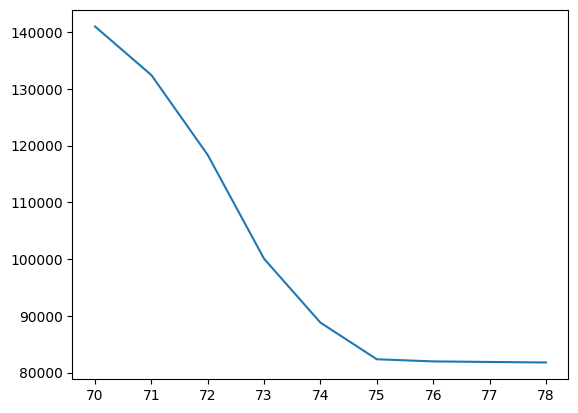

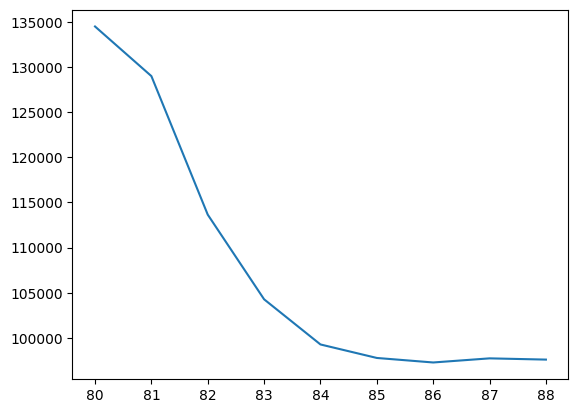

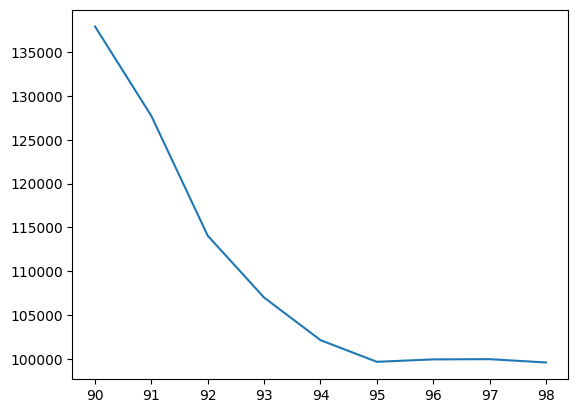

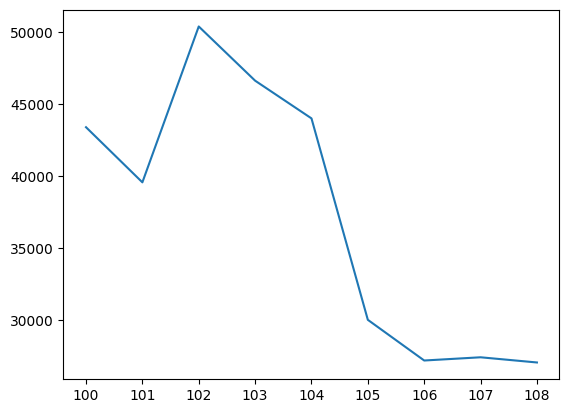

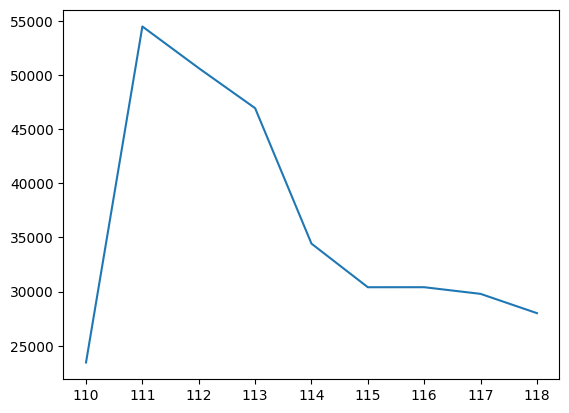

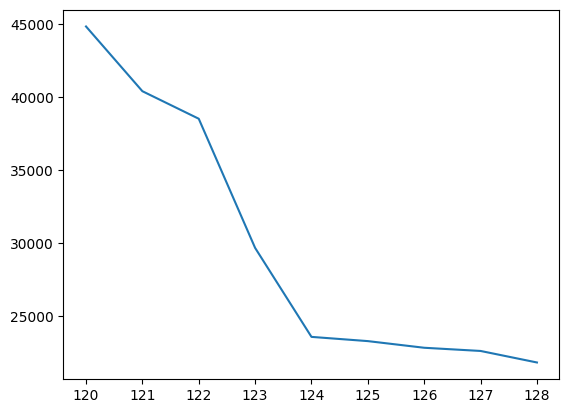

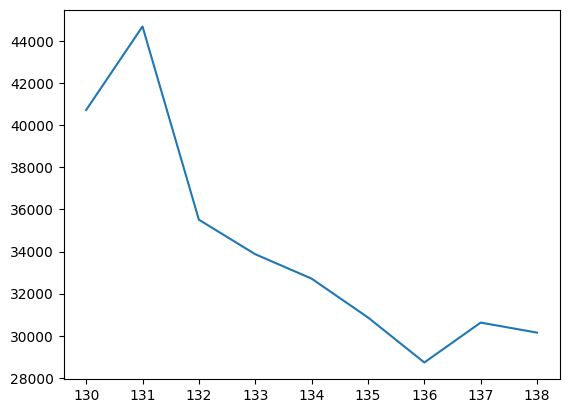

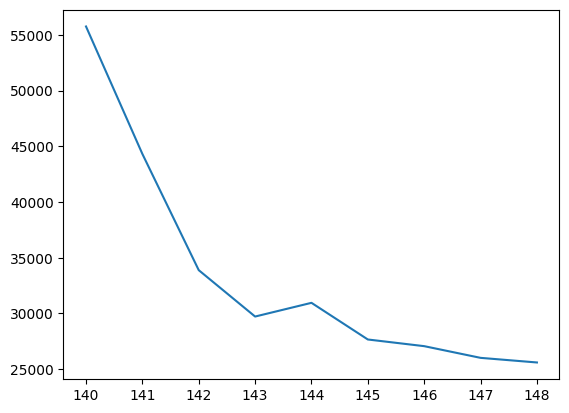

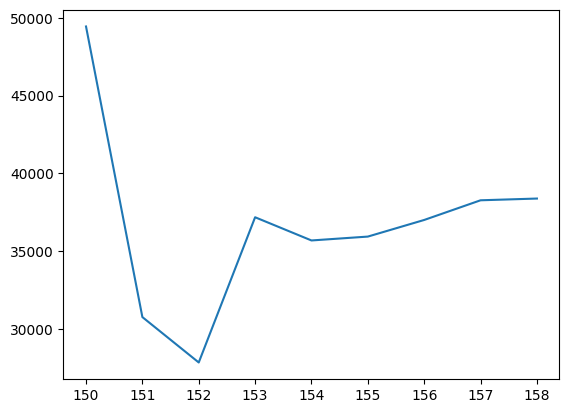

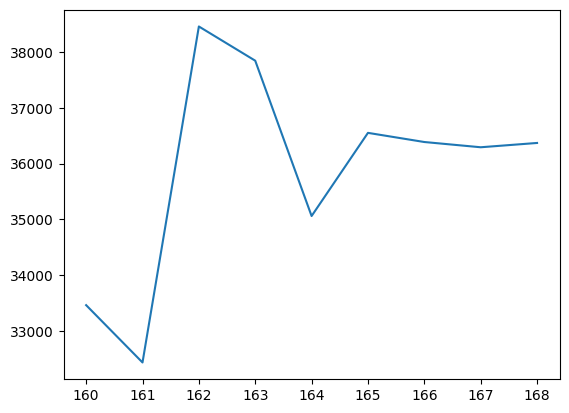

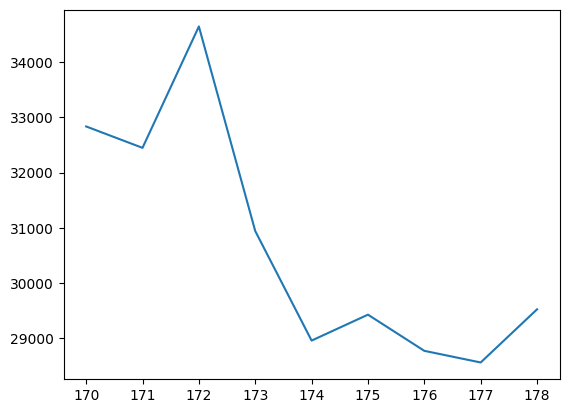

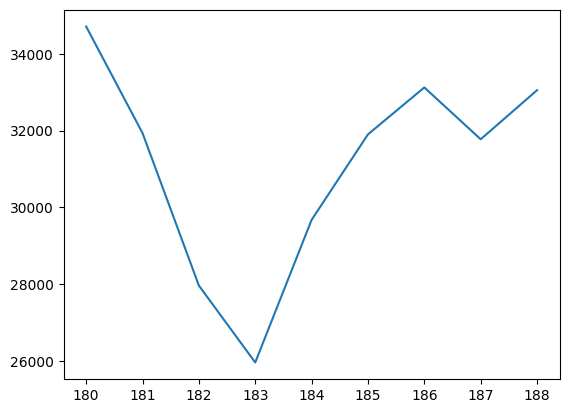

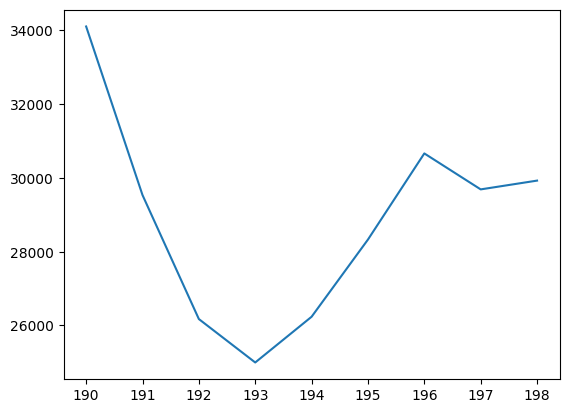

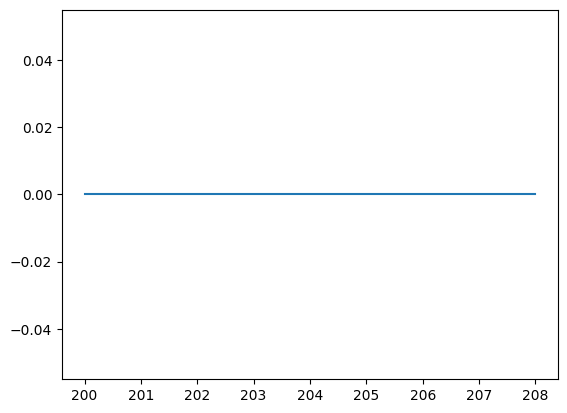

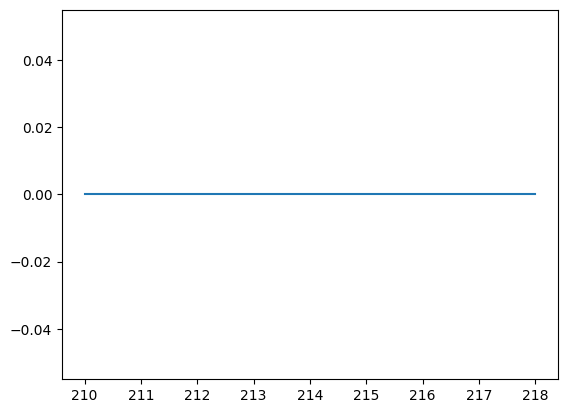

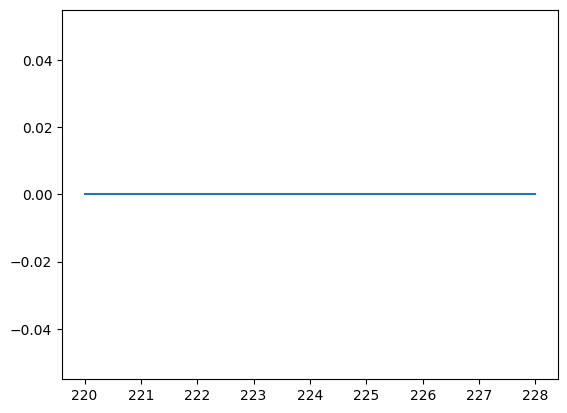

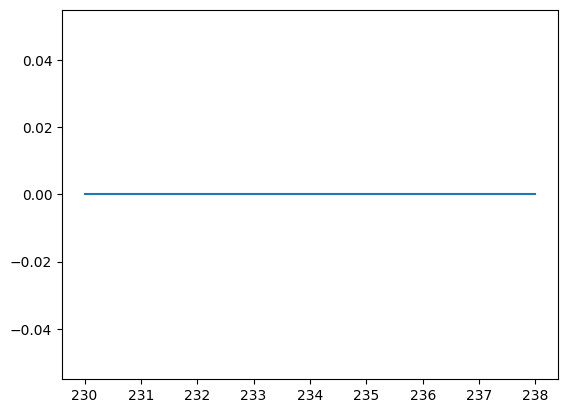

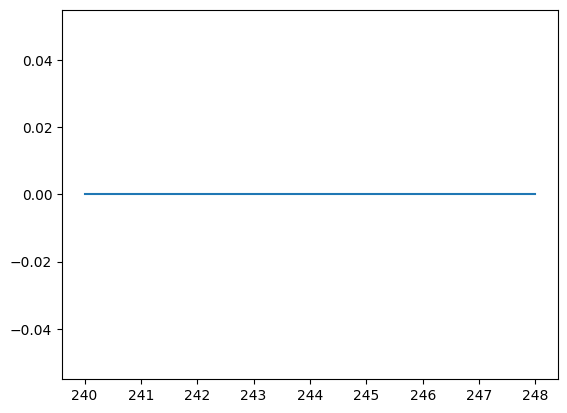

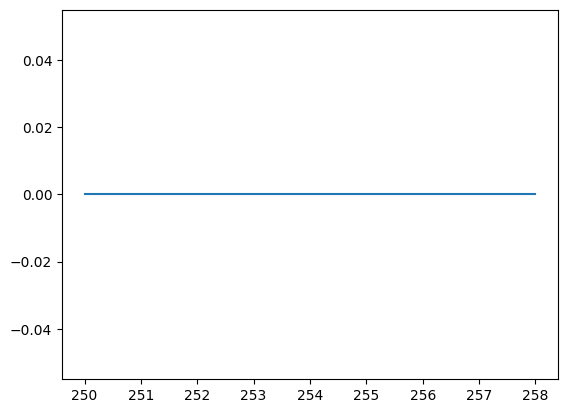

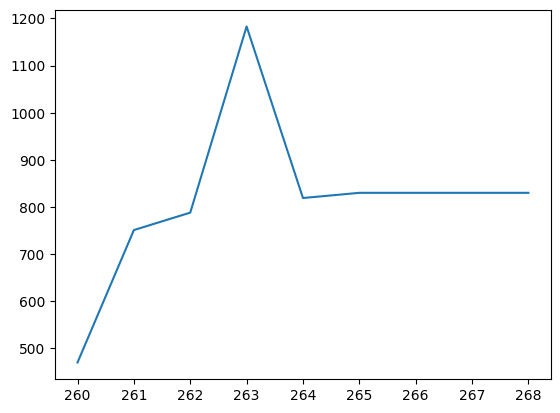

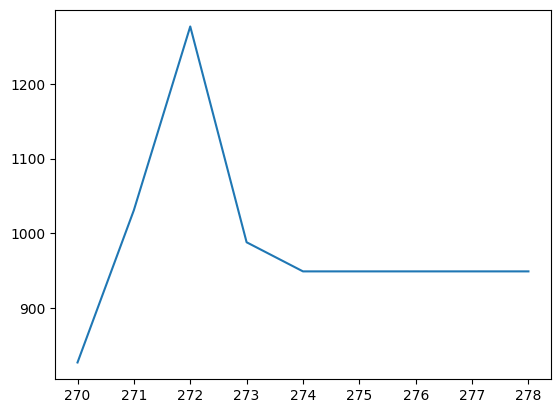

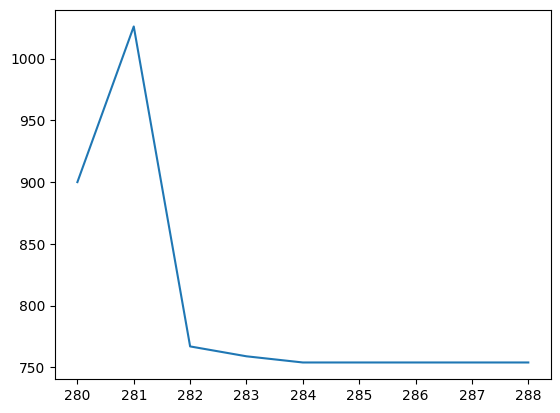

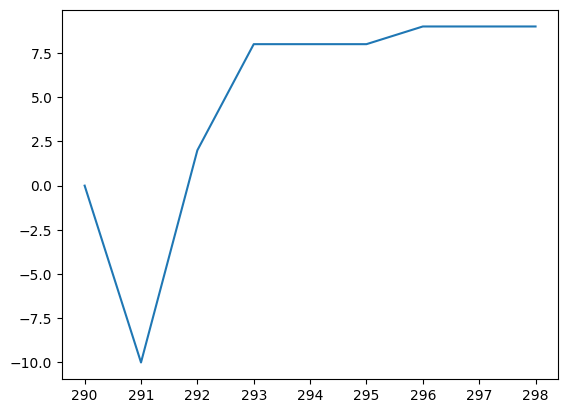

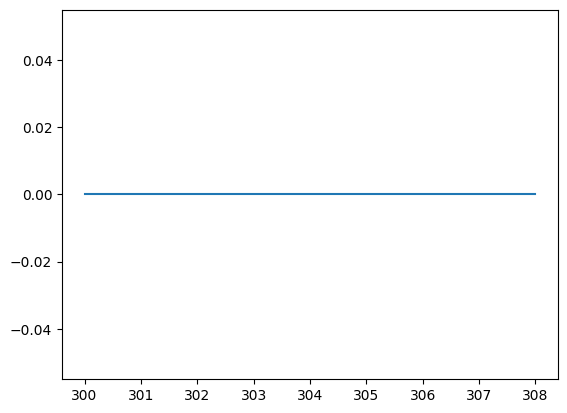

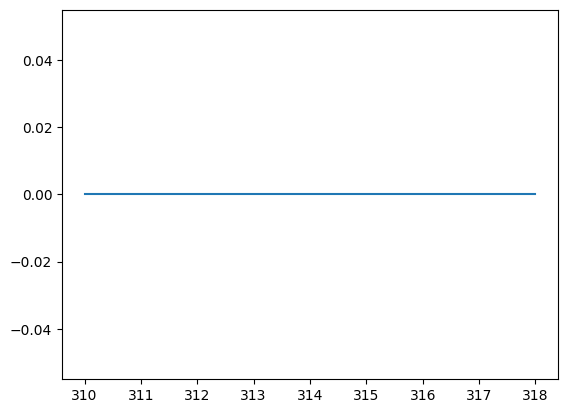

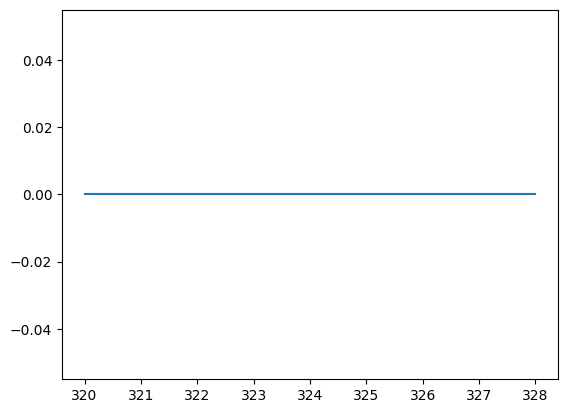

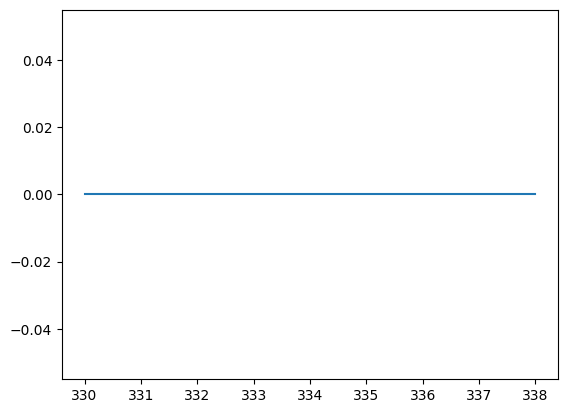

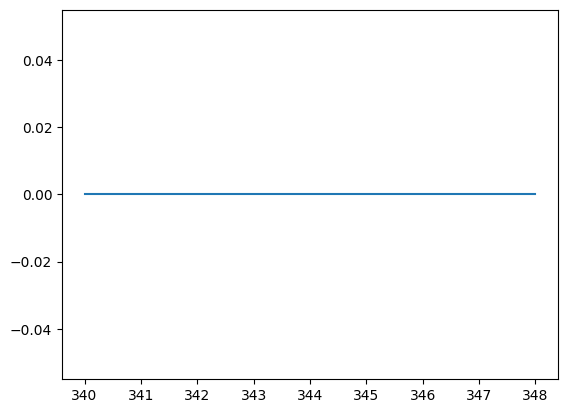

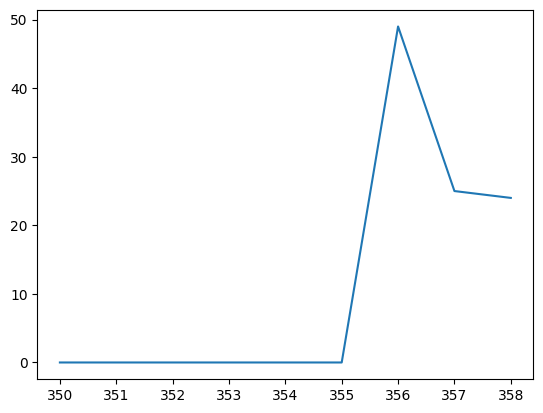

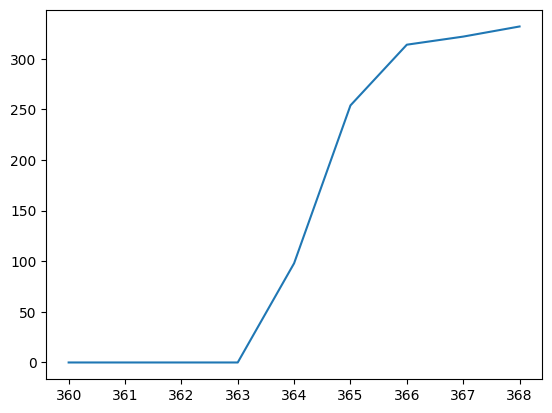

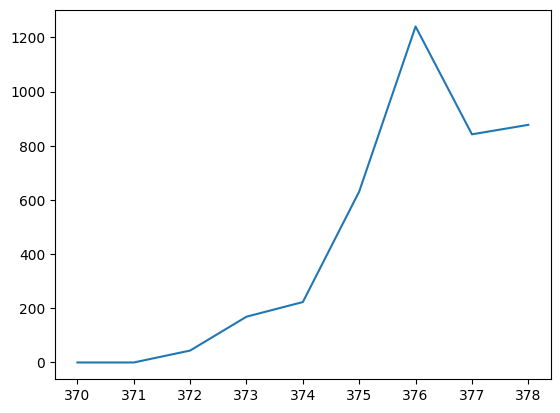

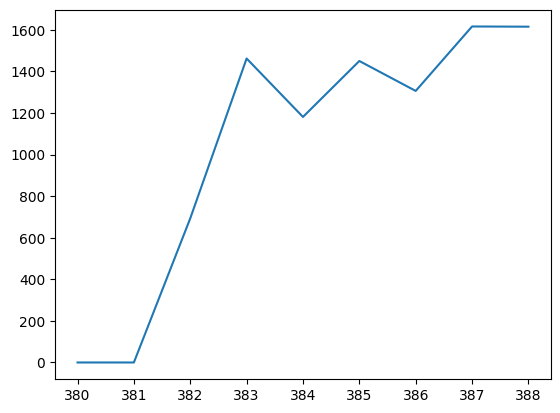

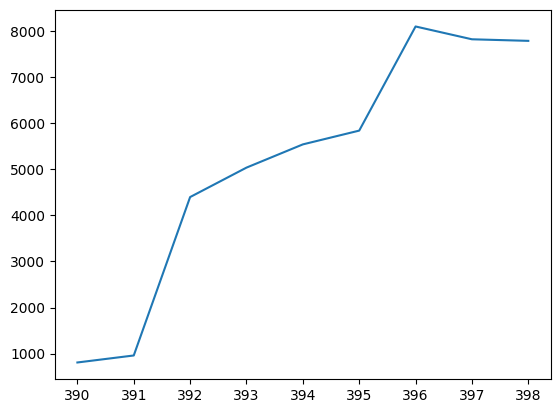

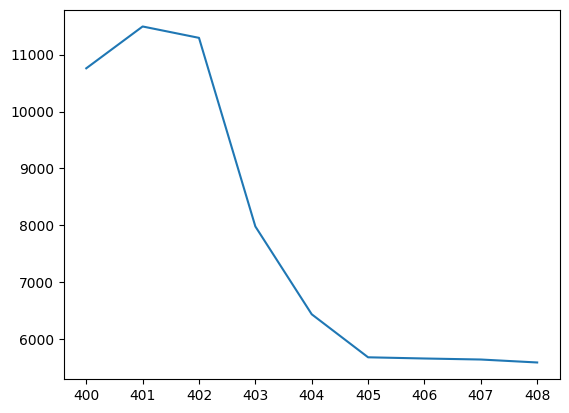

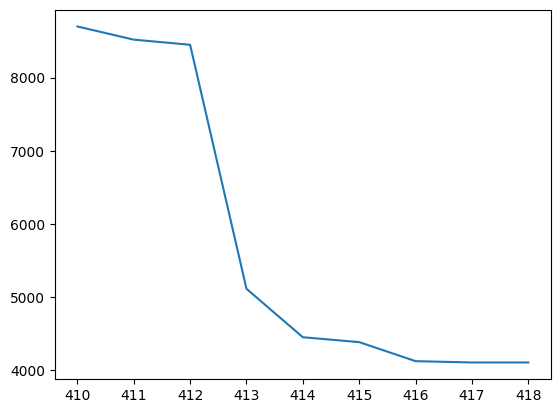

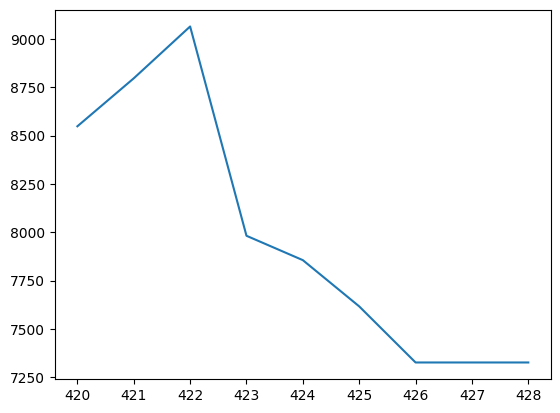

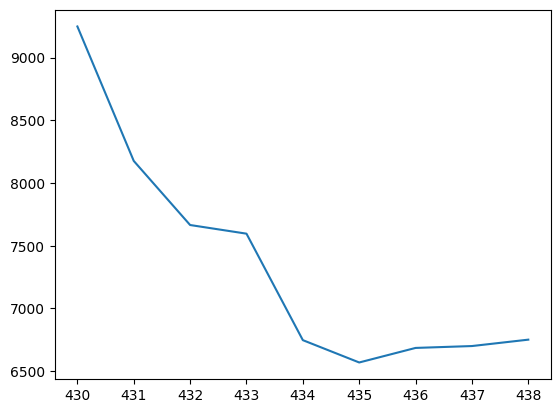

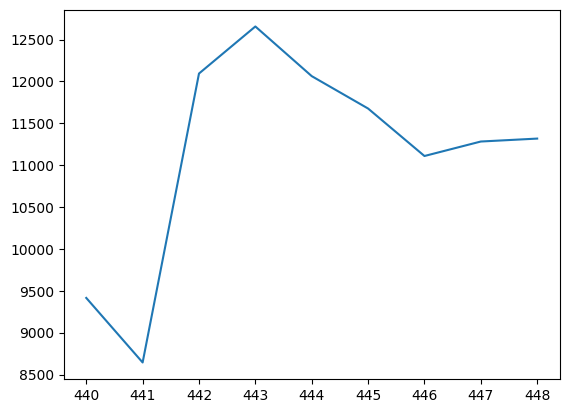

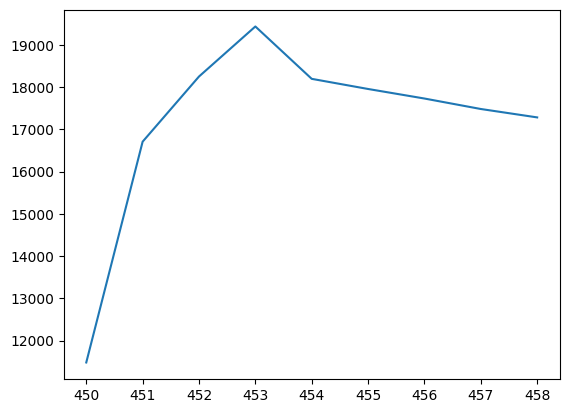

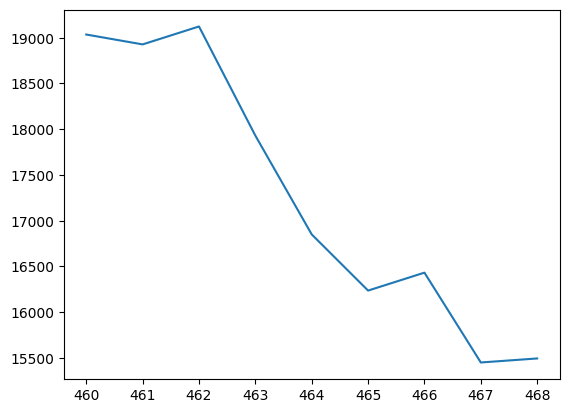

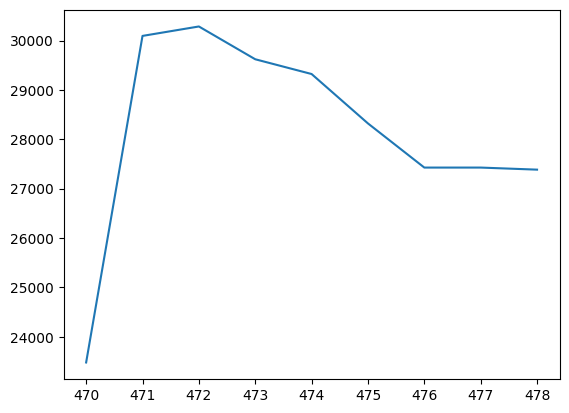

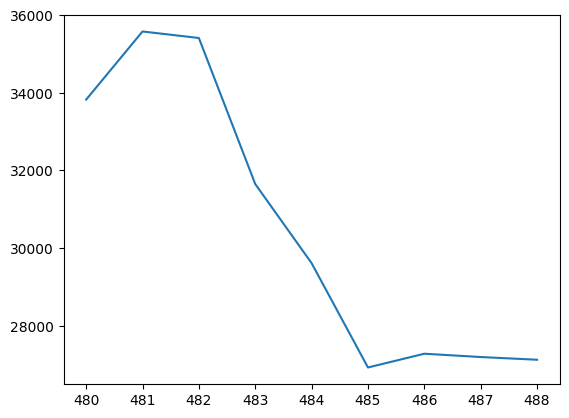

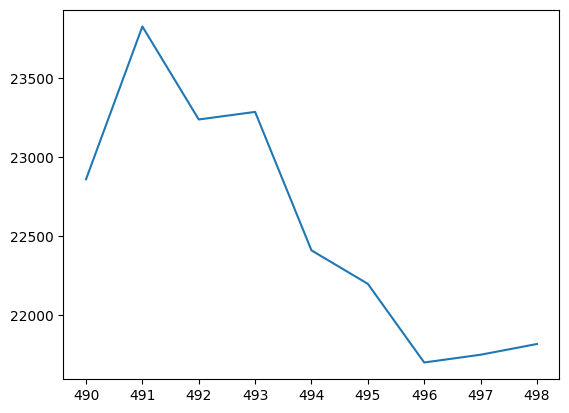

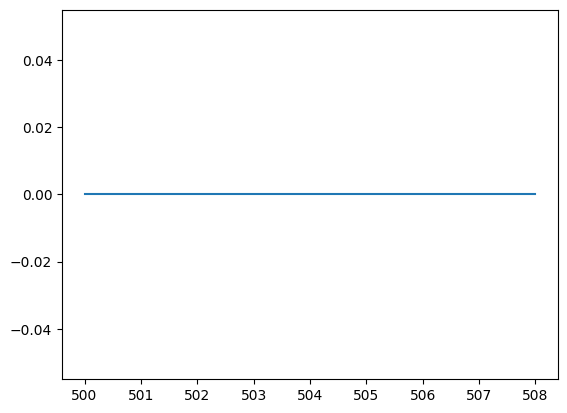

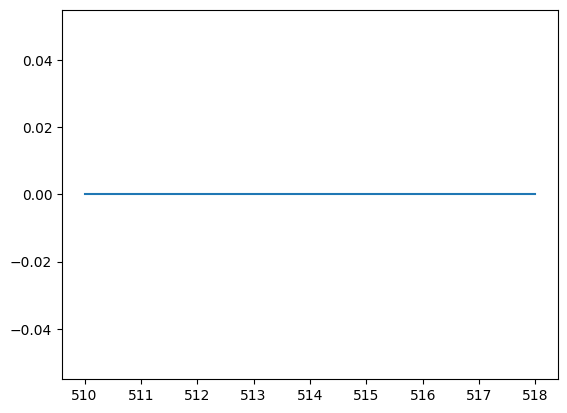

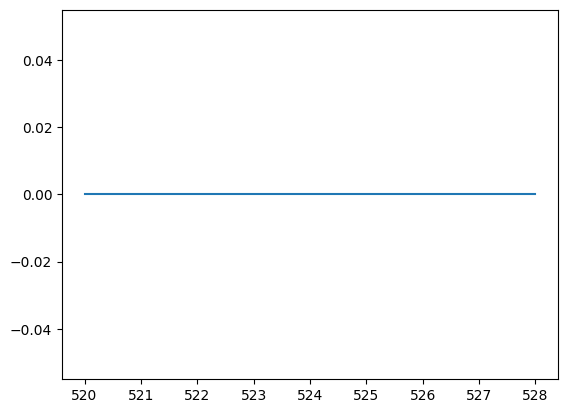

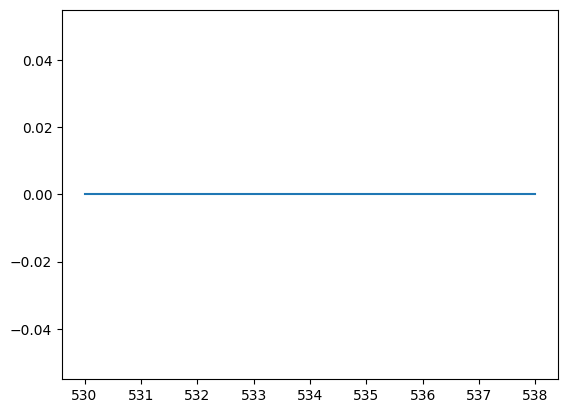

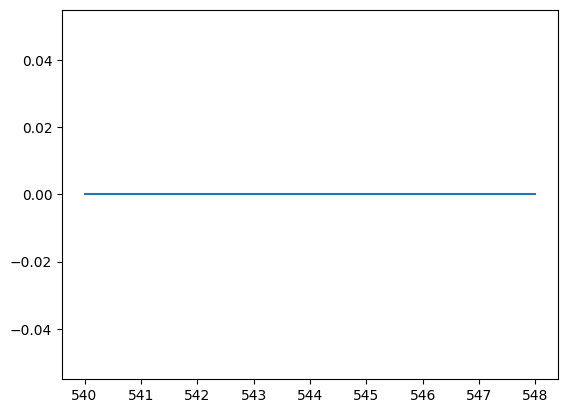

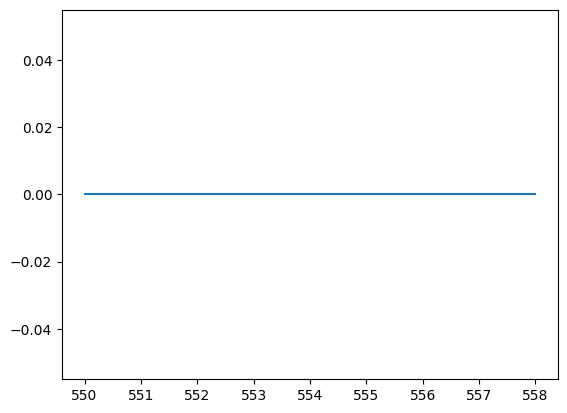

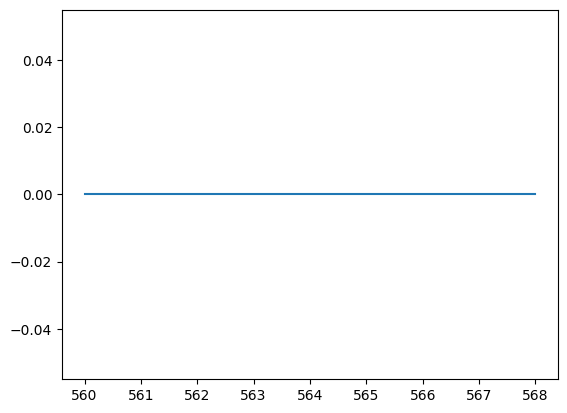

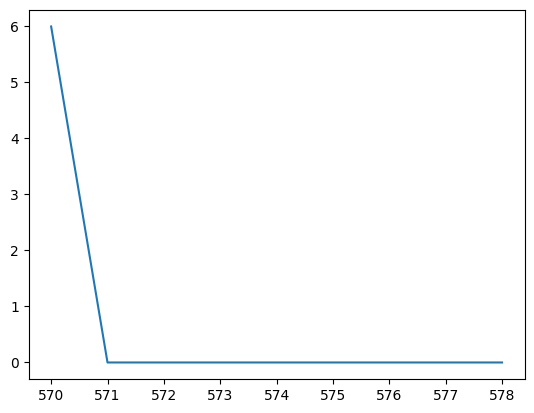

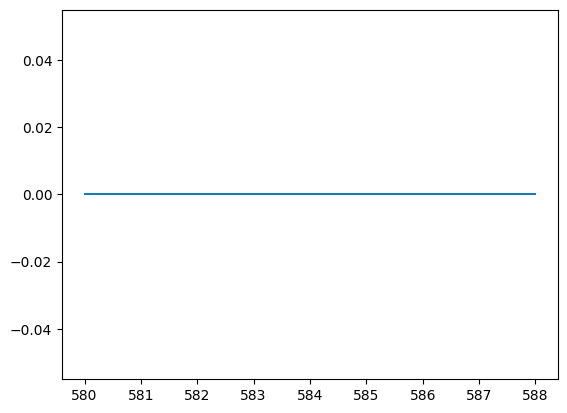

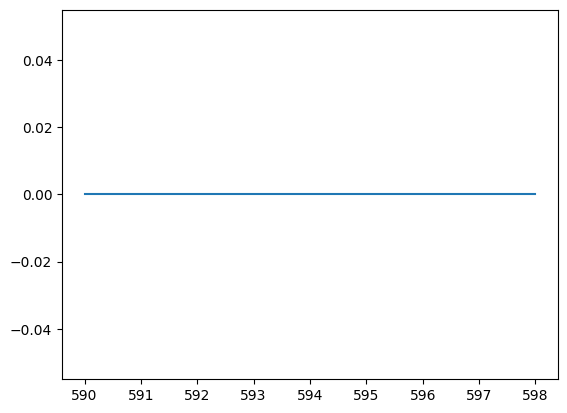

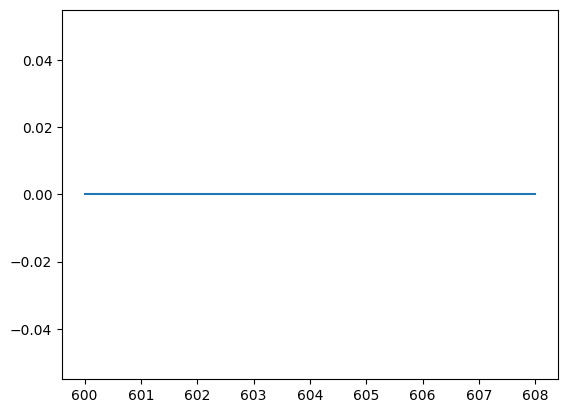

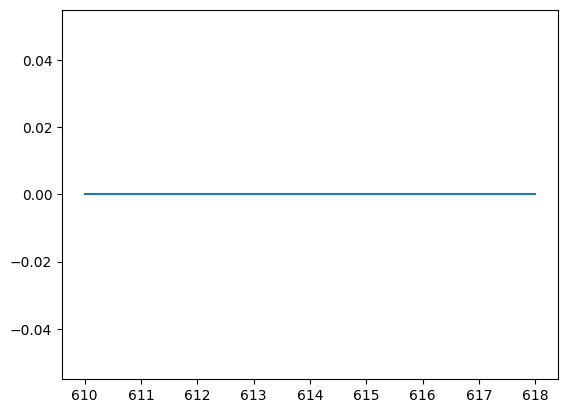

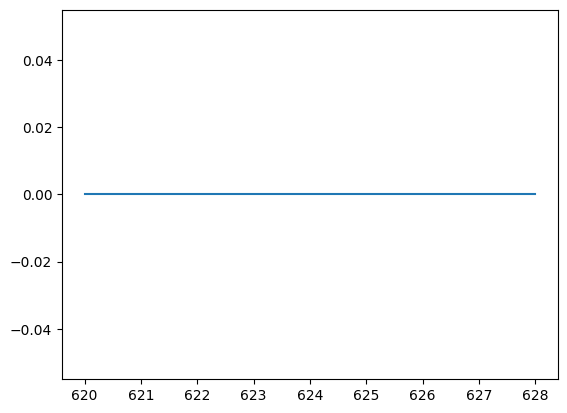

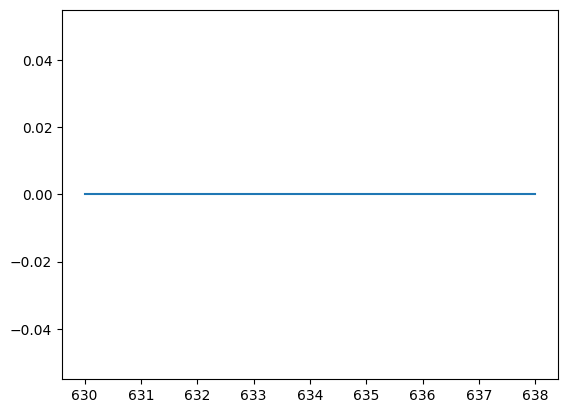

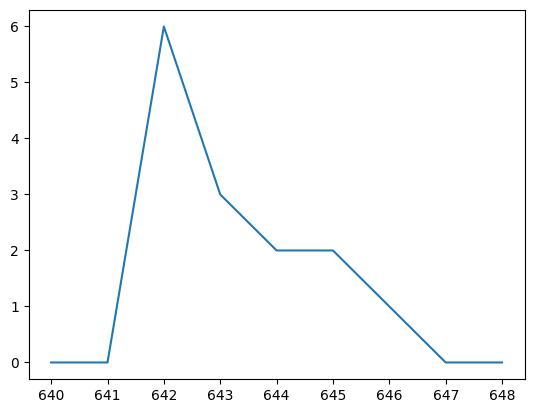

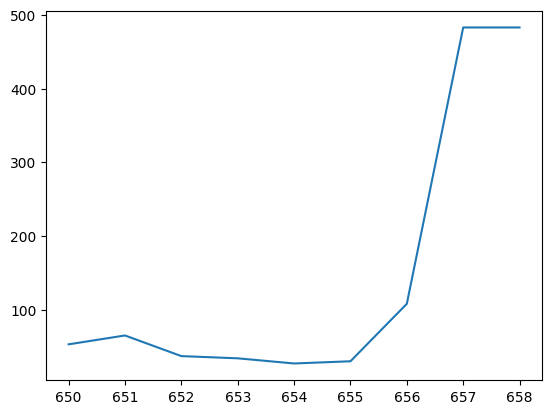

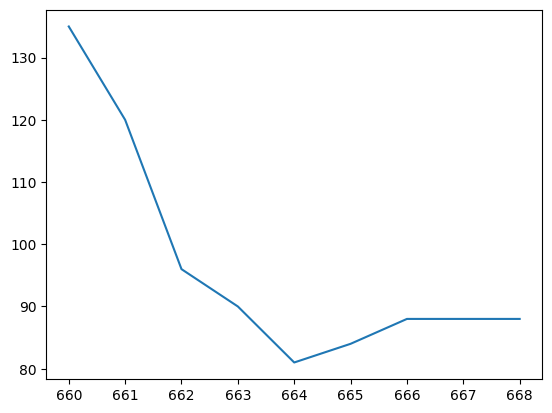

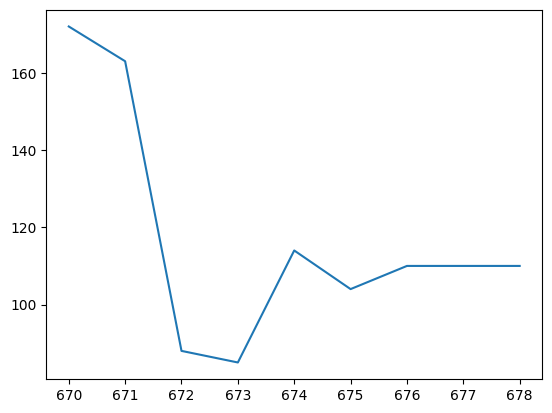

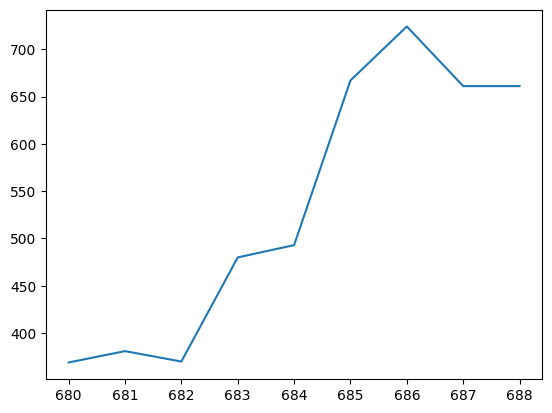

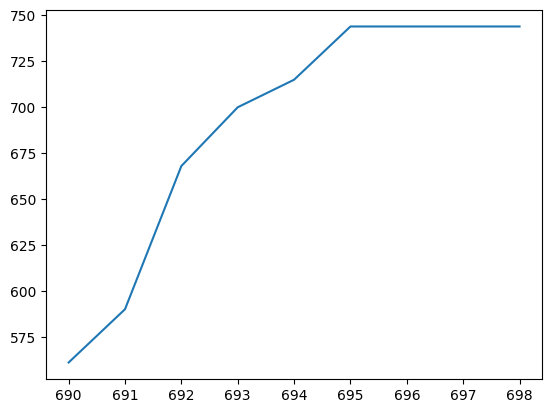

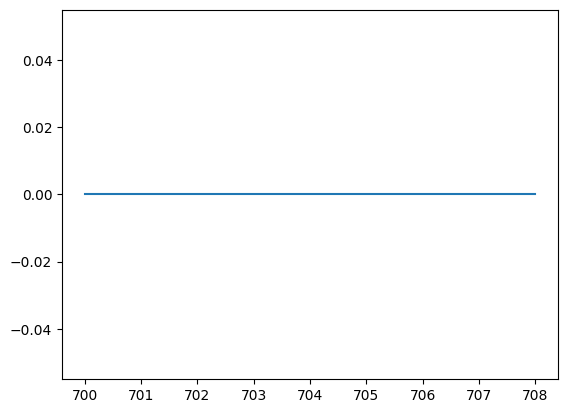

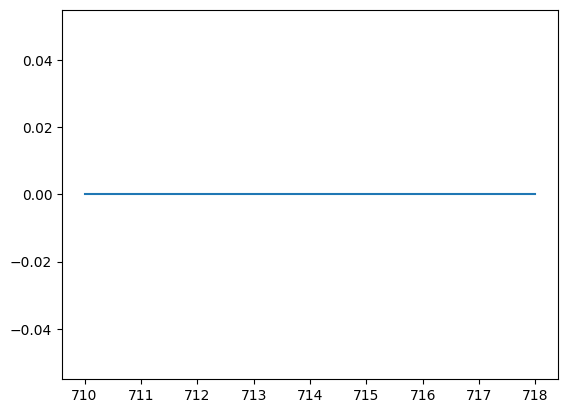

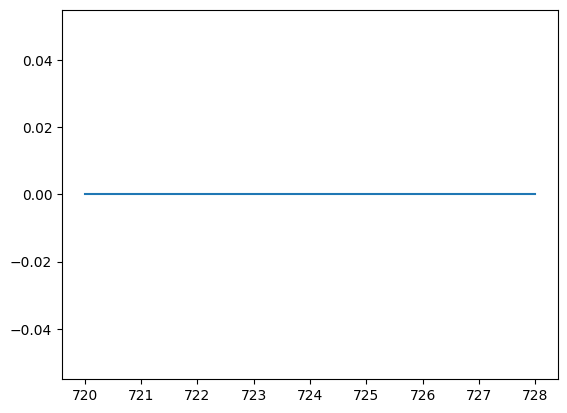

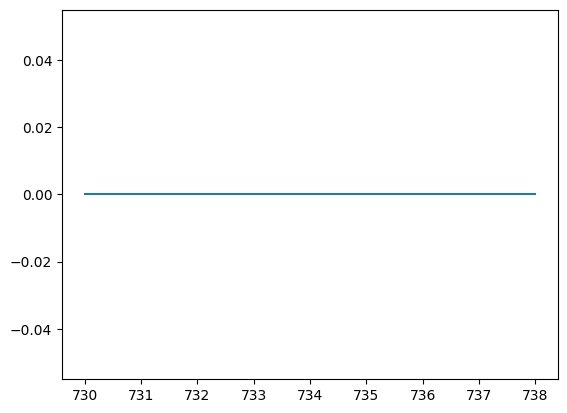

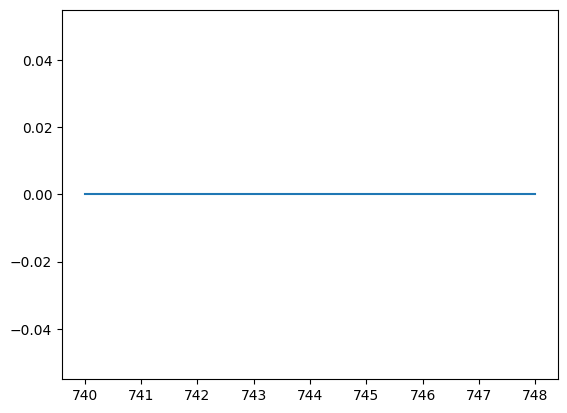

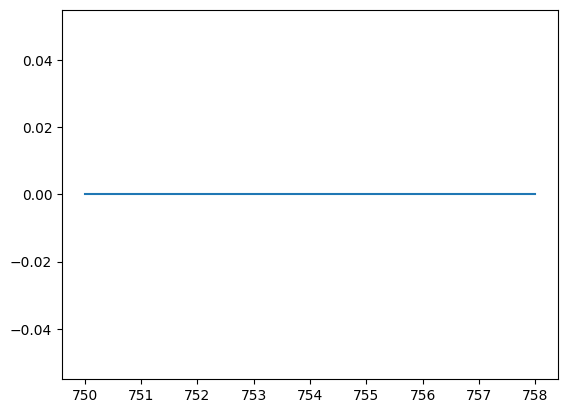

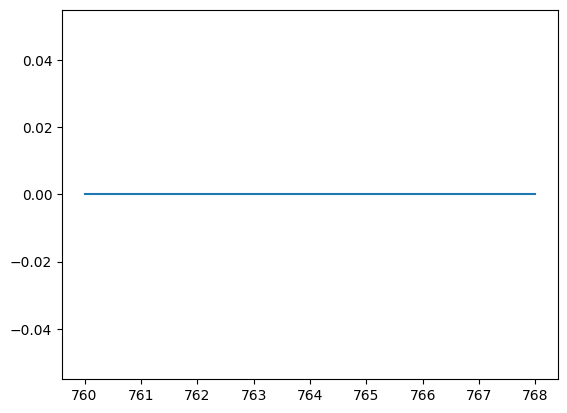

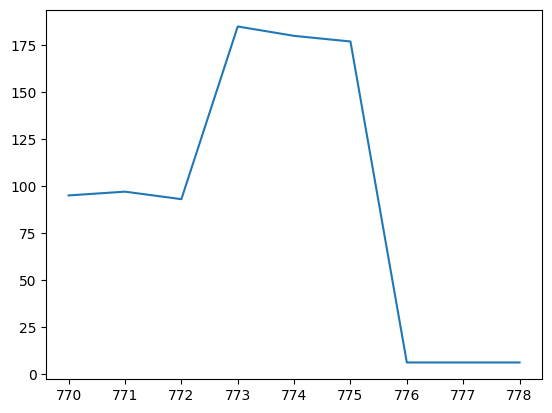

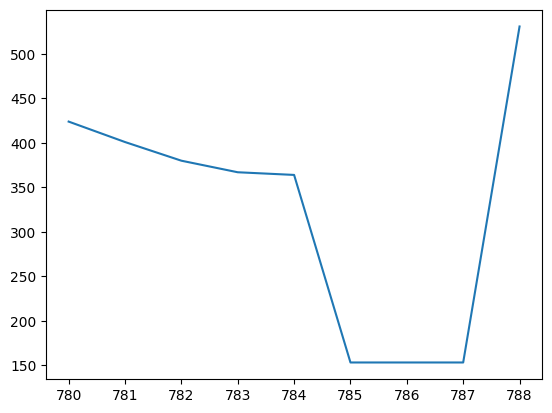

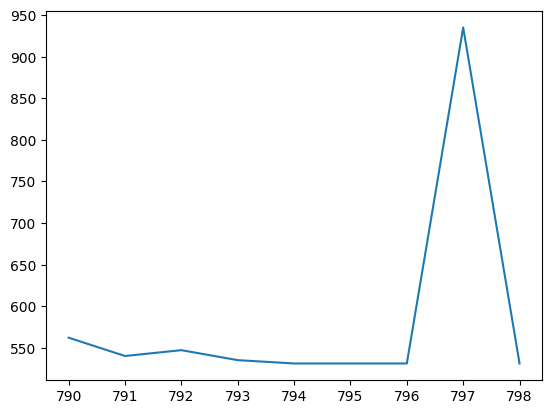

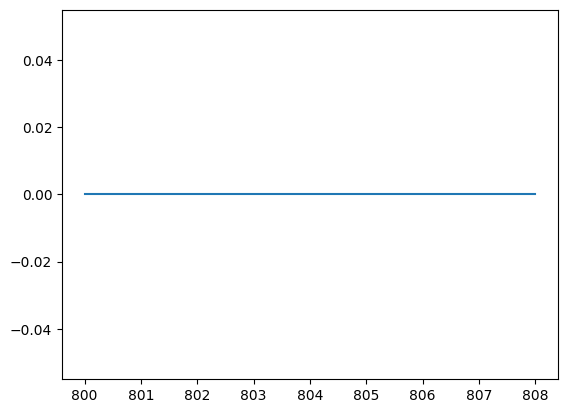

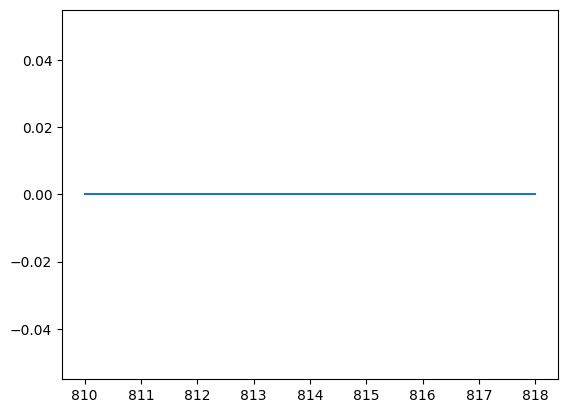

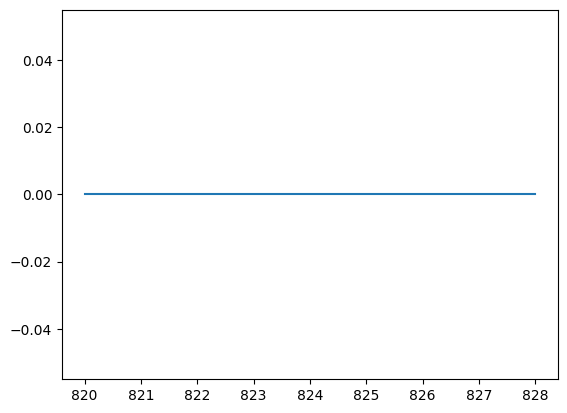

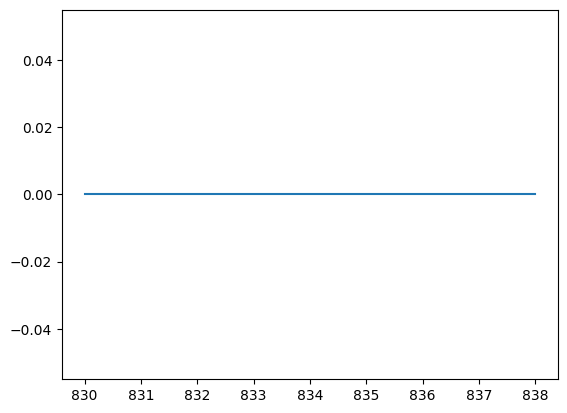

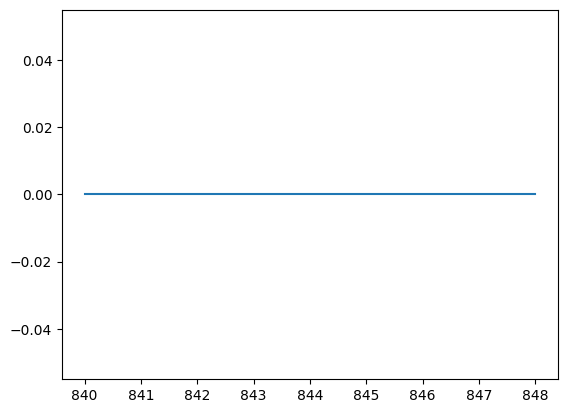

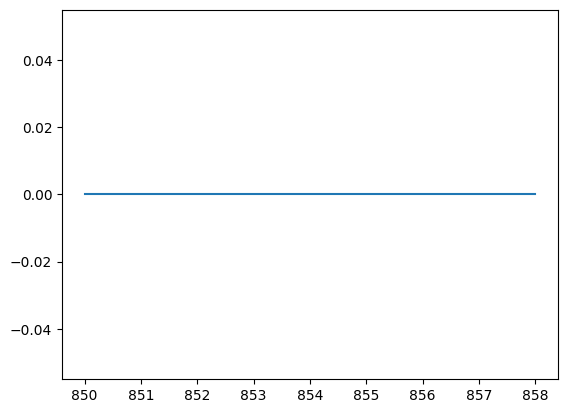

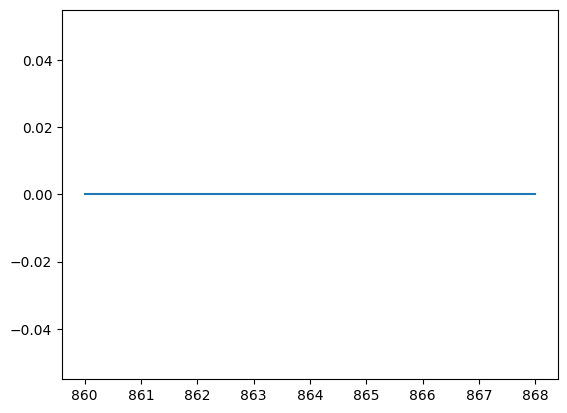

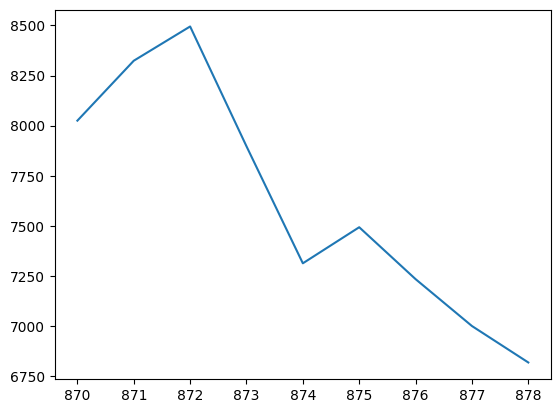

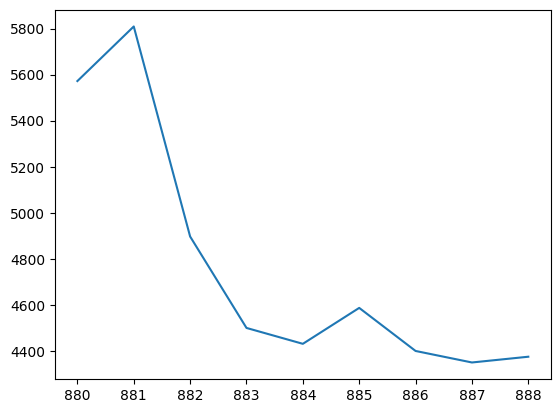

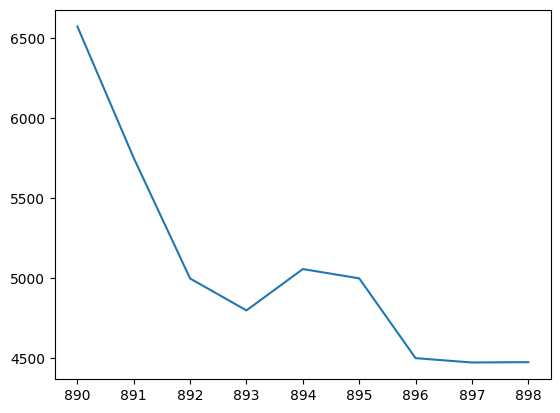

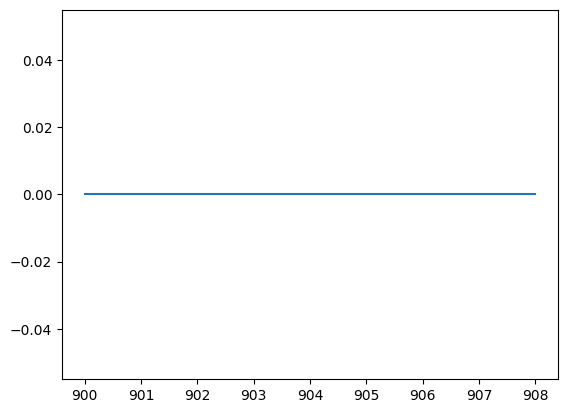

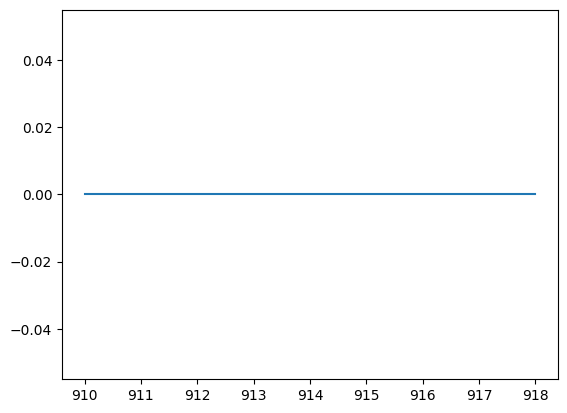

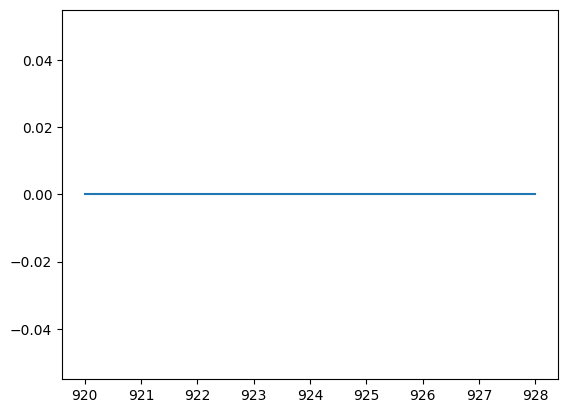

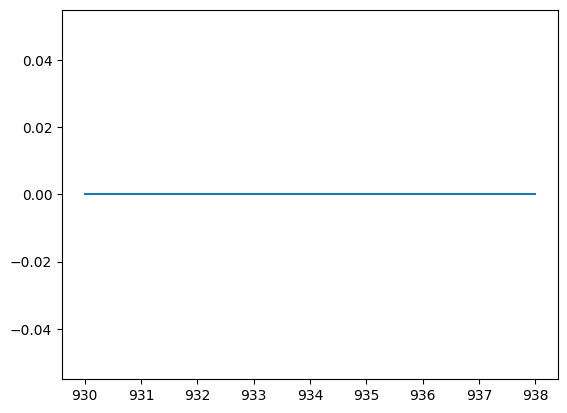

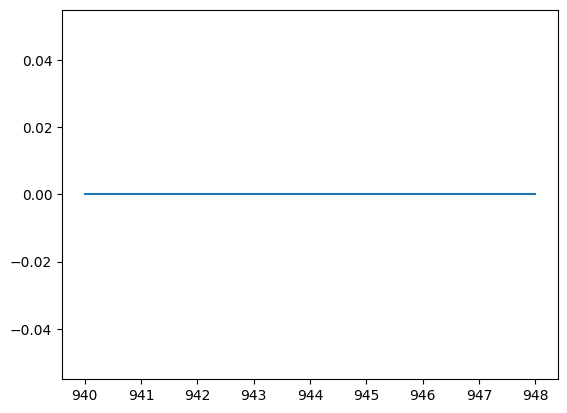

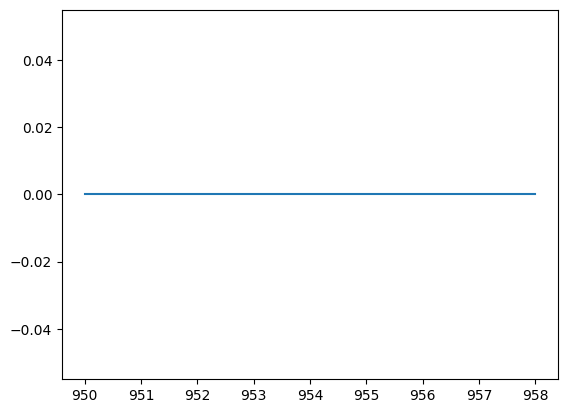

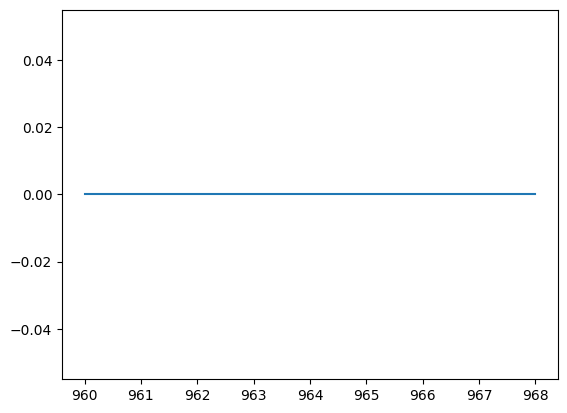

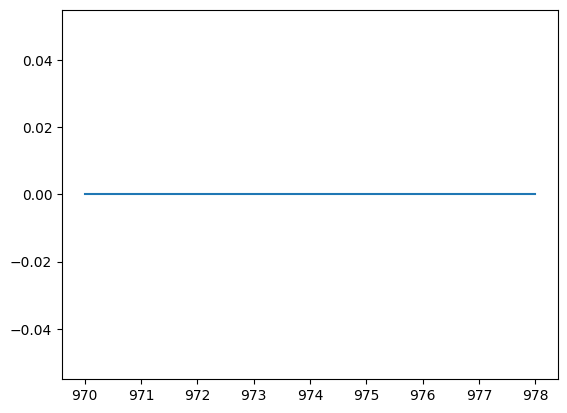

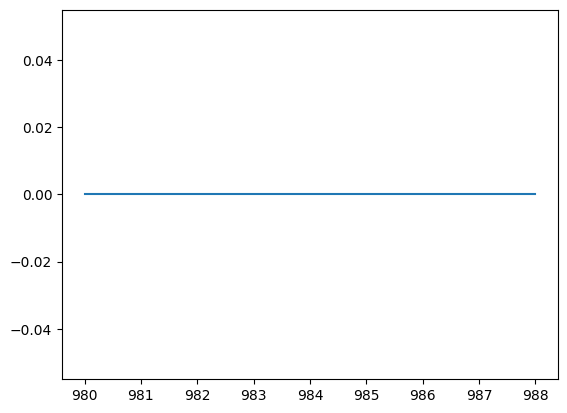

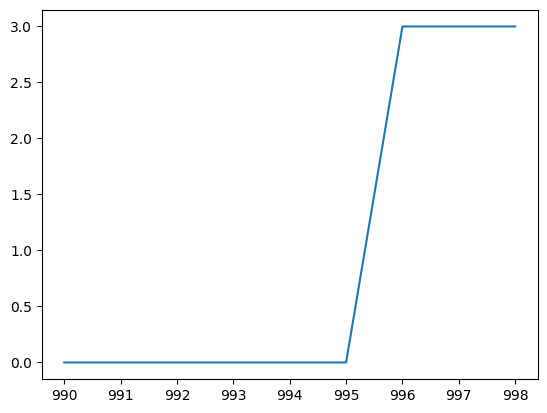

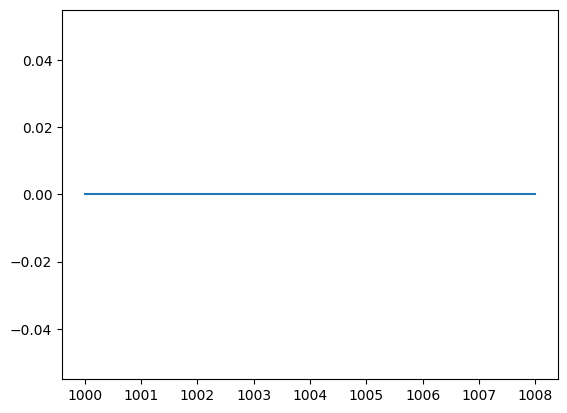

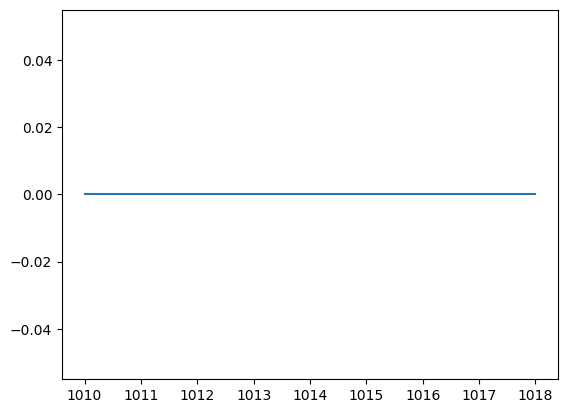

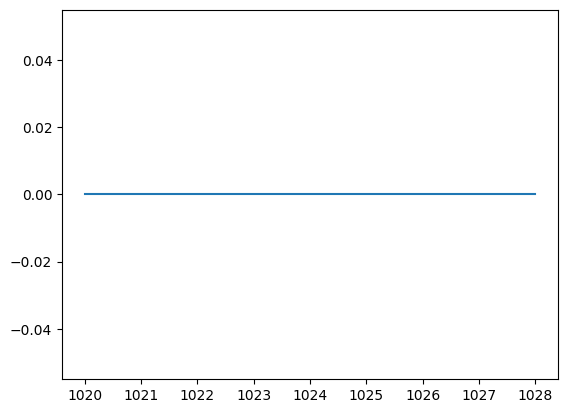

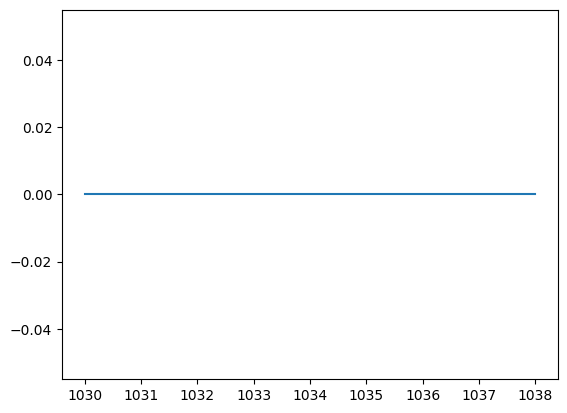

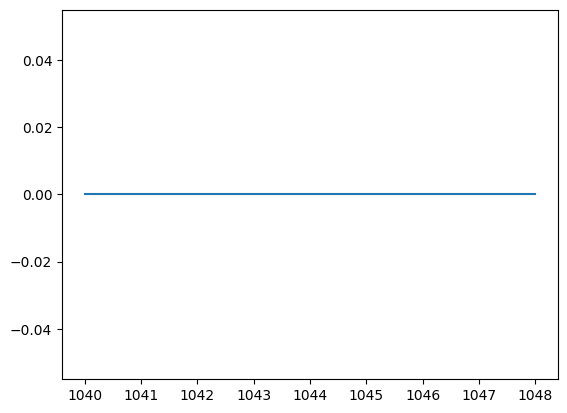

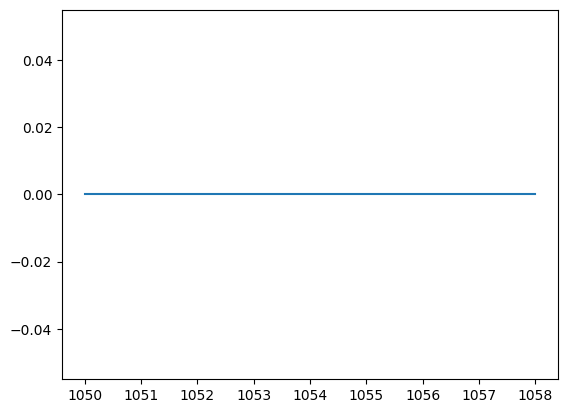

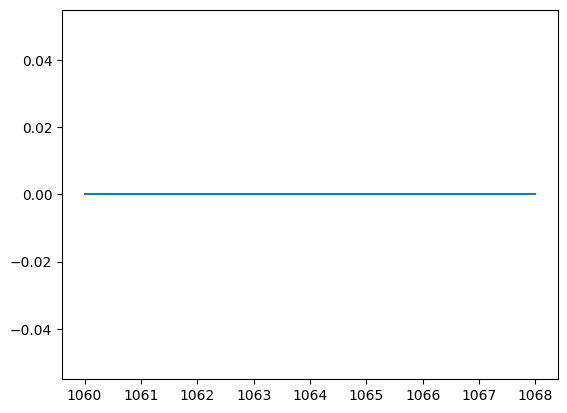

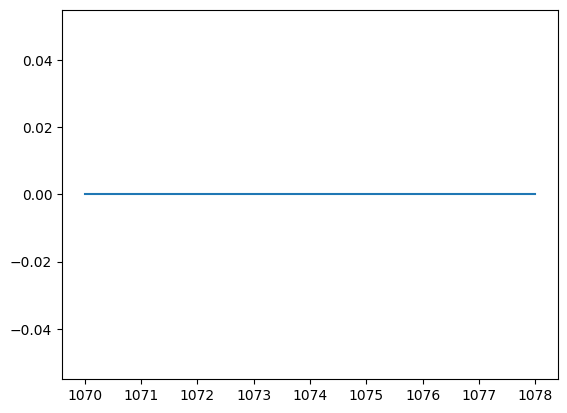

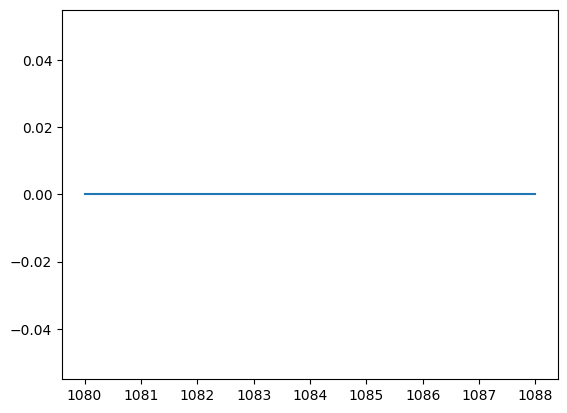

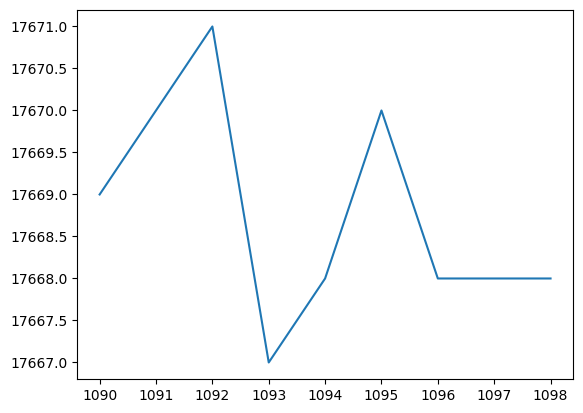

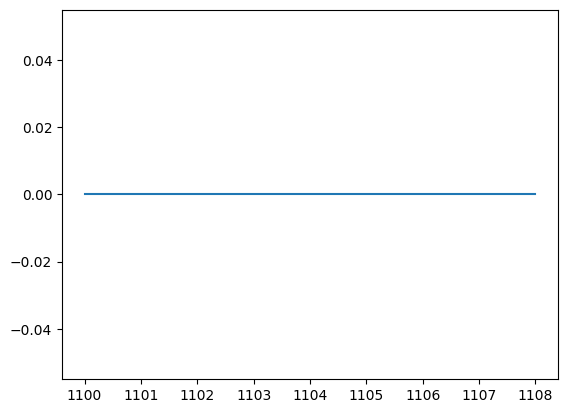

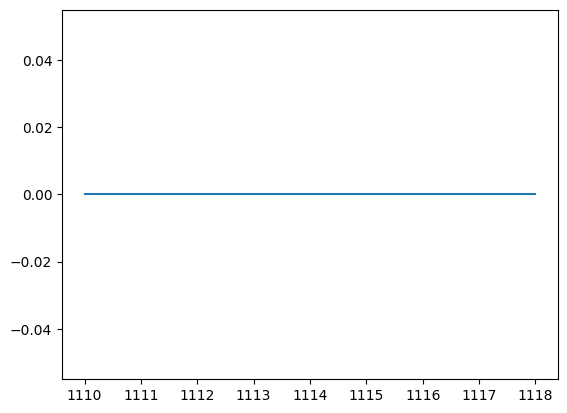

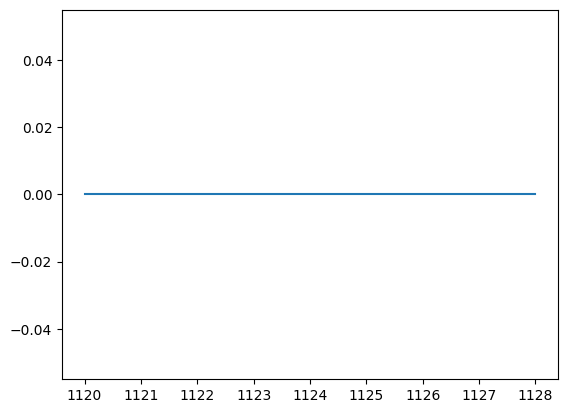

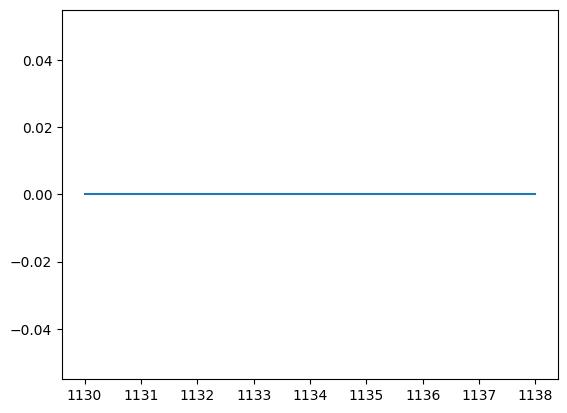

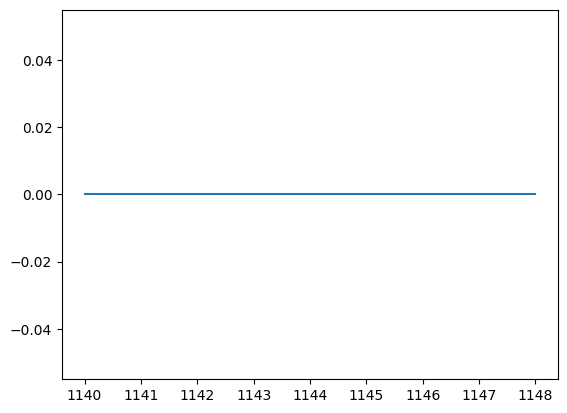

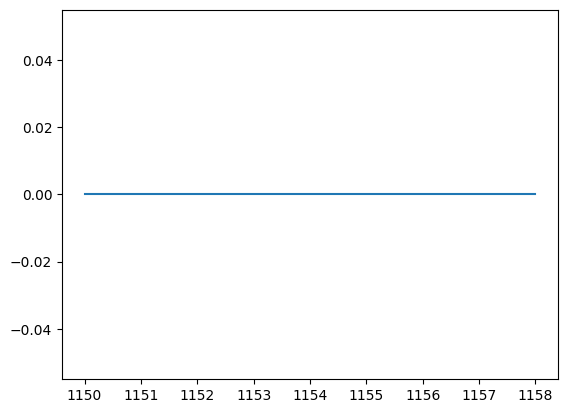

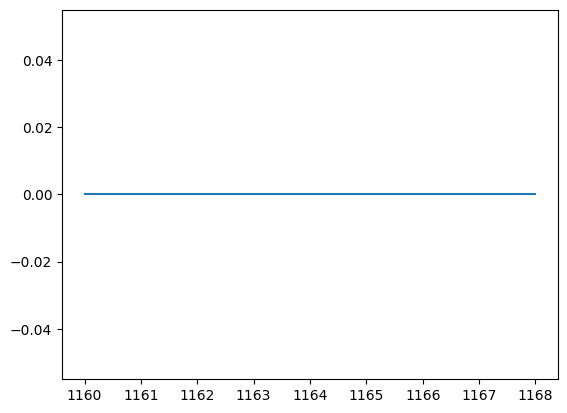

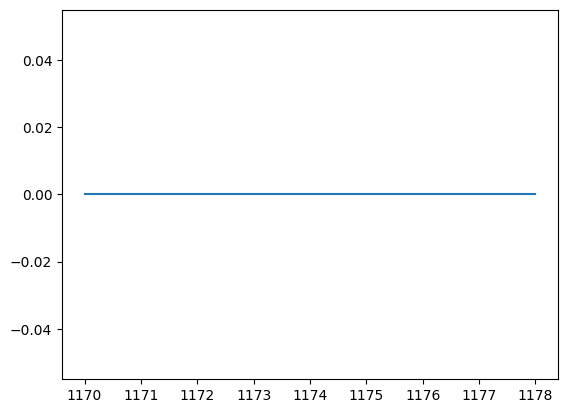

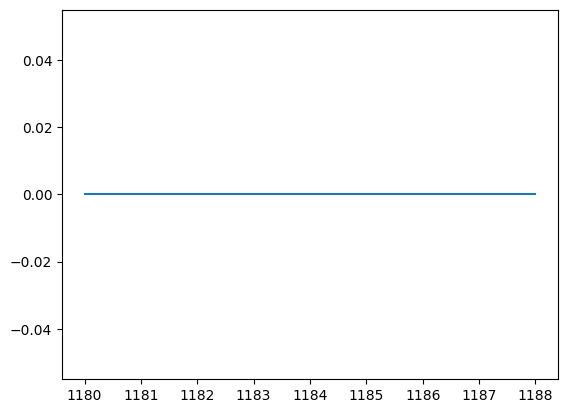

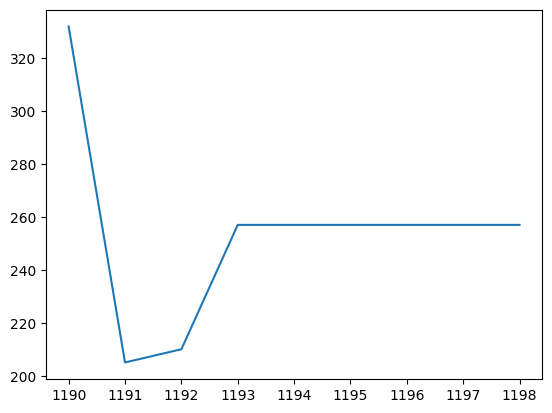

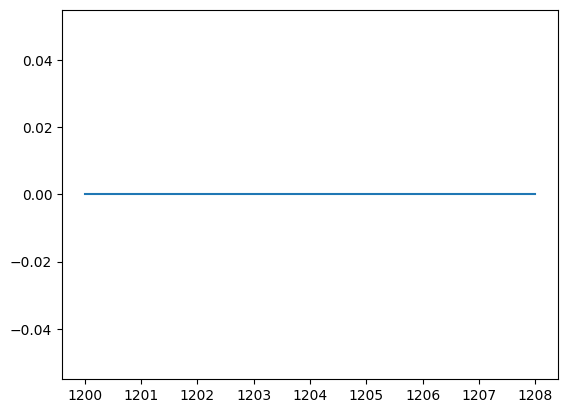

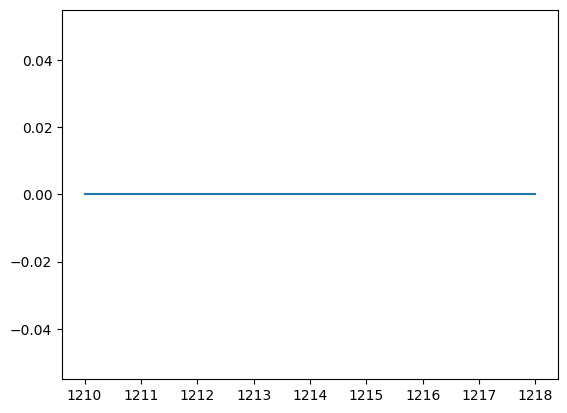

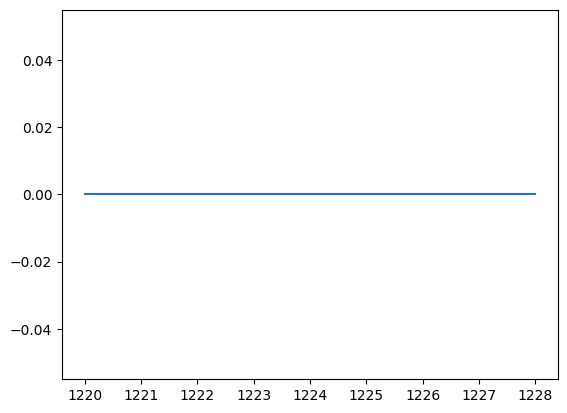

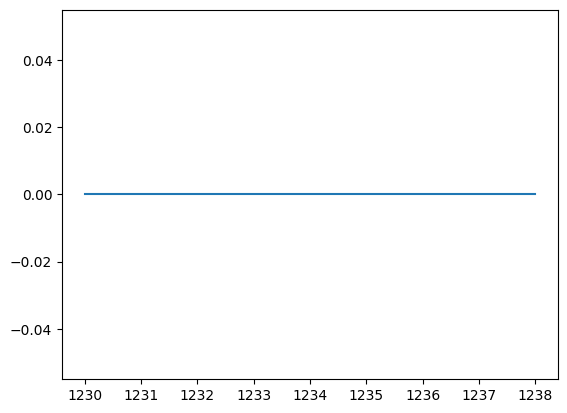

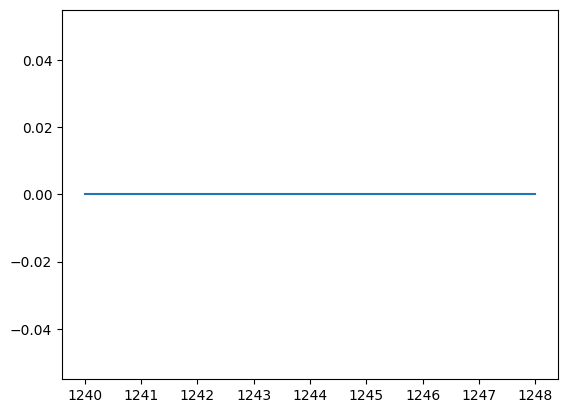

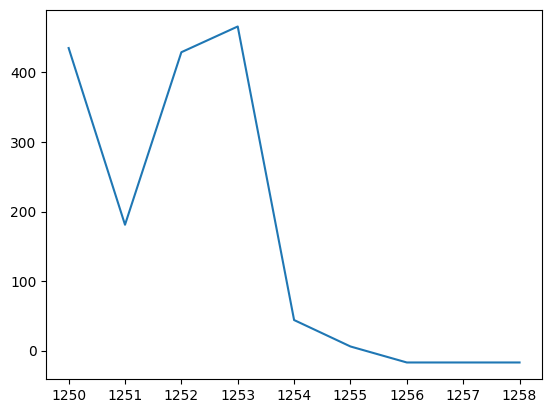

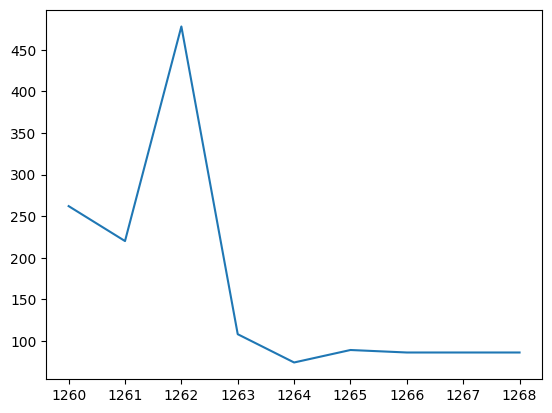

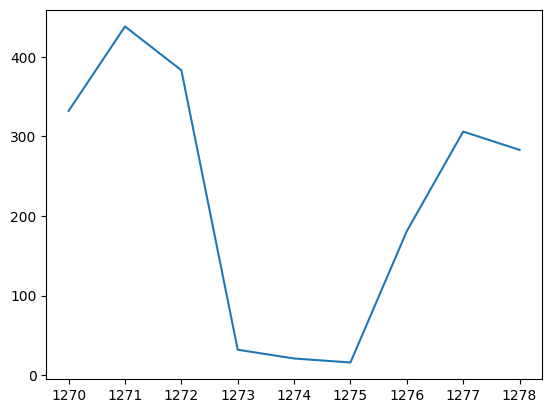

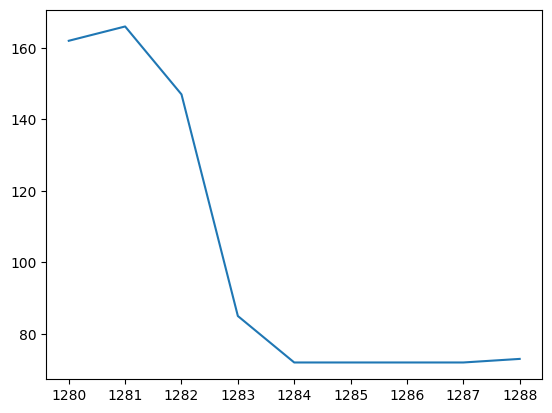

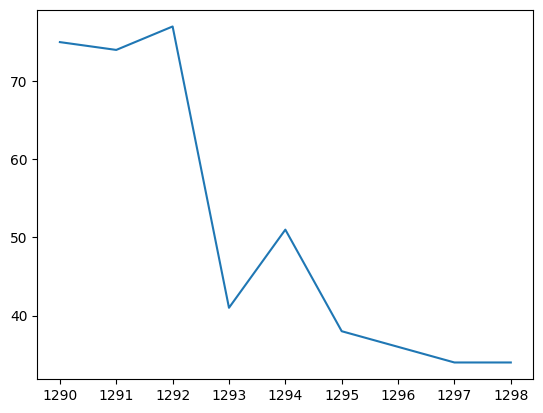

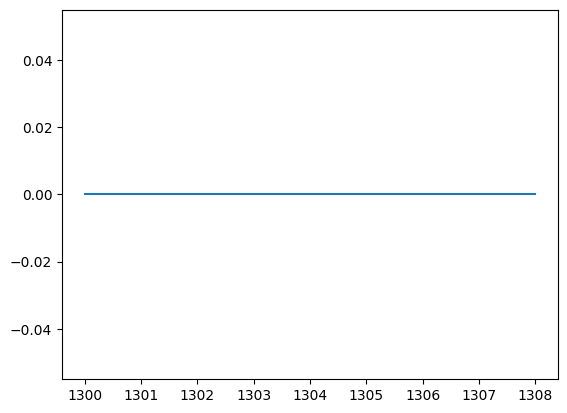

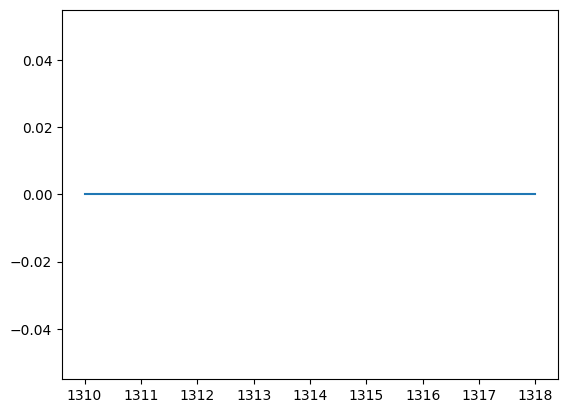

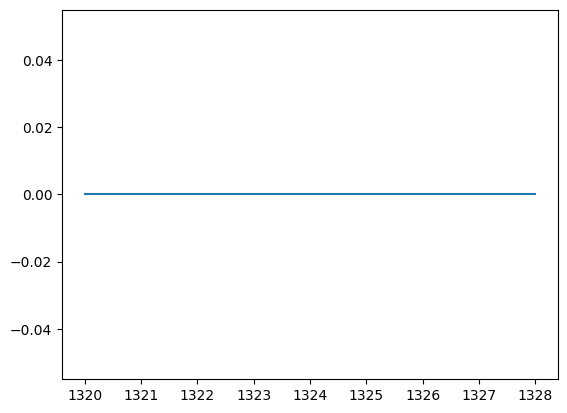

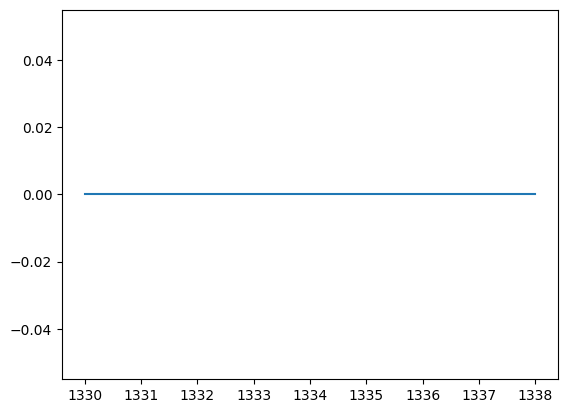

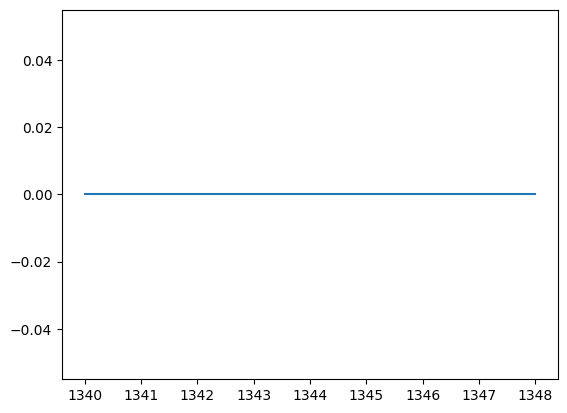

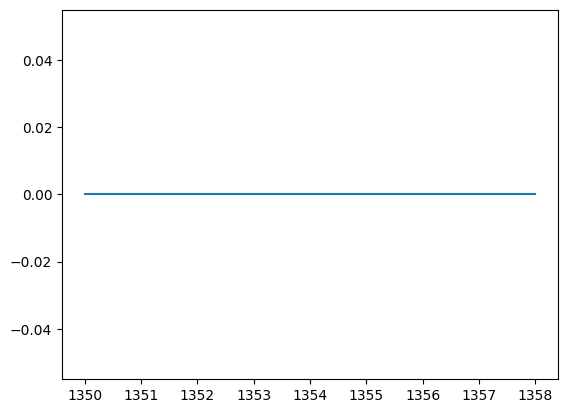

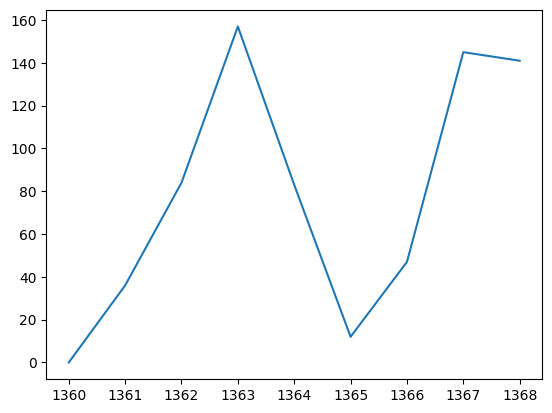

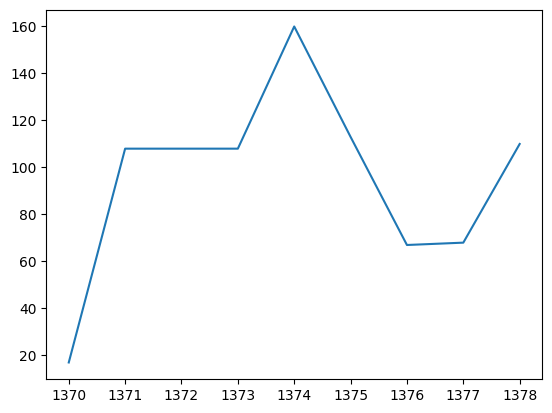

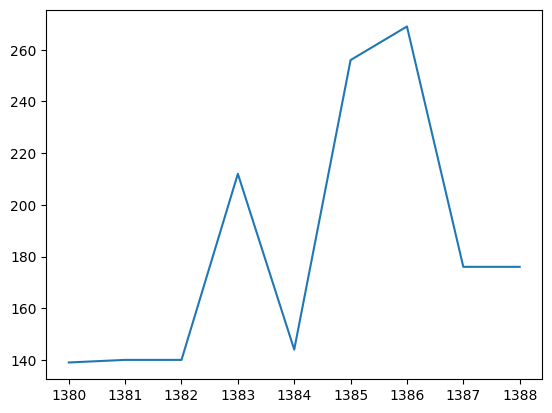

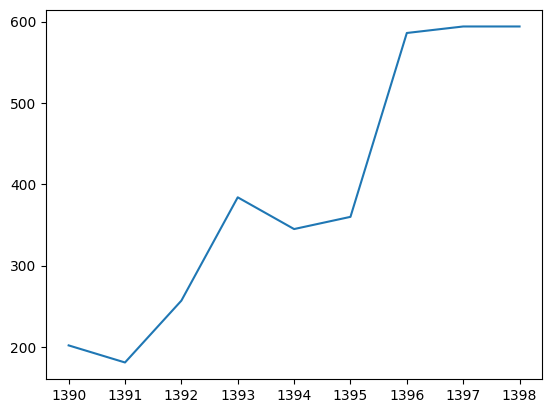

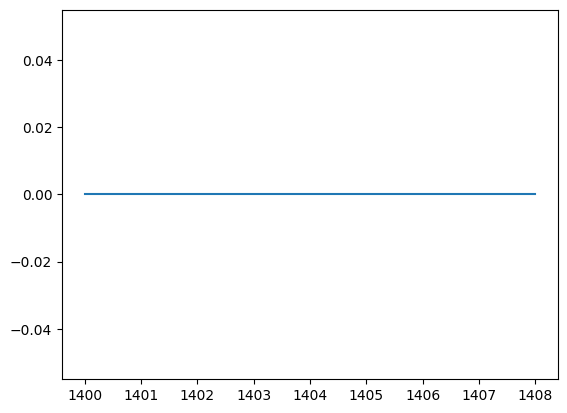

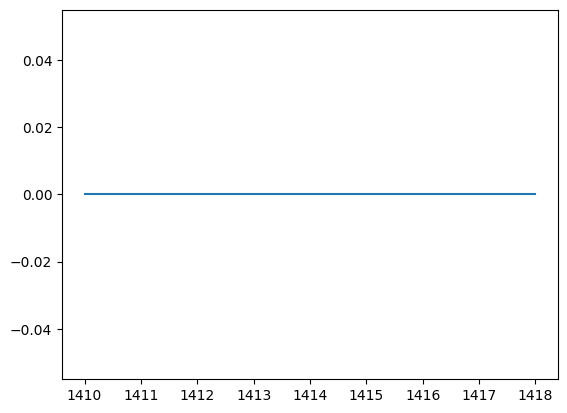

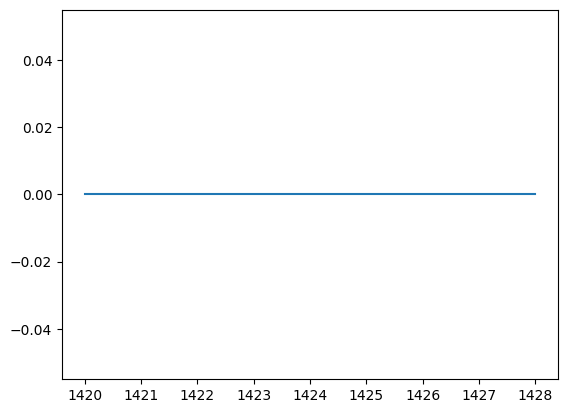

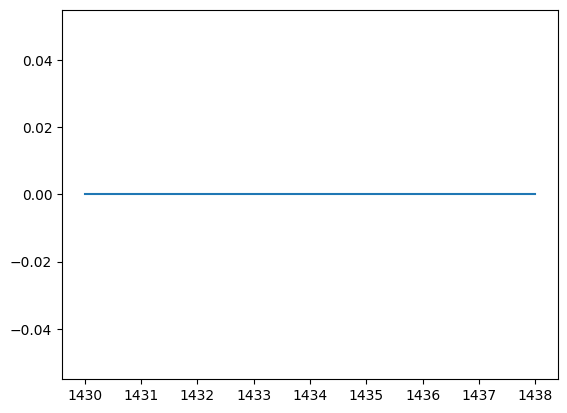

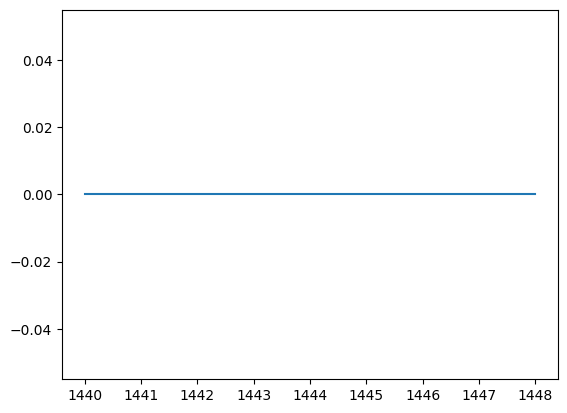

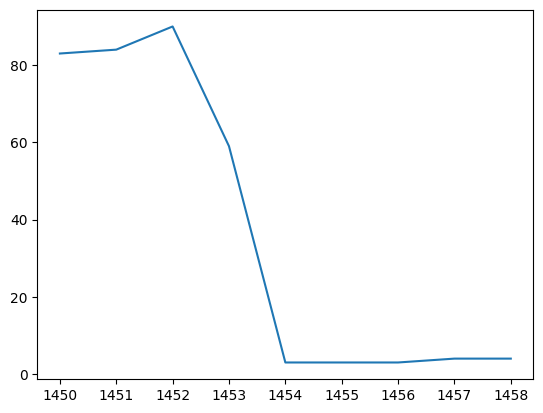

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

f1 = df['IncurLoss_F2']
# f2 = f1[0:10]
# f2.plot()

for i in range(340):
  f2 = f1[10*i:(10*i)+9]
  f2.plot()
  plt.show()

